### Análisis de datos 

Notebook en el que voy a llevar a cabo el análisis de los datos extraídos para poder dar conclusiones

In [2]:
# Importo las librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns


In [3]:
# Cargo el dataset limpio
df_datos = pd.read_csv('DF_caracteristicas_limpio.csv')

Empiezo generando un cuadro donde voy a anotar la información que tengo
| Variable | Descripción | Tipo de variable | Importancia Inicial | Notas |
|----------|----------|----------|----------|----------|
| Marca   | Marca del vehículo   |    | 1   | Sirve para identificar   |
| Modelo    | Modelo concreto   |   | 1   | Sirve para identificar |
| Carrocería    | Tipo de vehículo   |    | 0   | Si nos interesa más un tipo de vehículo u otro   |
| Largo    | Lo que mide   |    | 1   | Longitud   |
| Alto    | Altura  |    | 3   | Altura  |
| Ancho   | Ancho  |    | 1   | Ancho   | Tanto la Longitud como la anchura son importantes para saber si caben en las plazas de garage
| Peso    | Peso   |   | 3  | Peso   |
| Maletero    | Volumen del maletero   |    | 2   | Interesante sobre todo para viajar   |
| Depósito   | Capacidad del depósito de combustible   |    | 2   | Para saber cada cuanto reportar ( sobre todo si es bifuel)   |
| Potencia   | CV del motor   |    | 0   | Importante a la hora de viajar, fuera de ciudad   |
| Plazas   | Número de asientos   |    | 0   | Importante ya que es la clave de EDA   | En principio son todos de 6 plazas en adelante
| Isofix   | Asientos donde poder llevar sillas adaptadas para niños y bebés  |    | 0   | Importante sobre todo en caso de llevar 6 pasajeros  |
| Consumo    | Lo que consume el motor  |    | 3   | Está bien el dato pero no es de vital importancia   |
| Combustible    | Tipo de combustible  |    | 1   | Interesante según las necesidades de los usuarios   |
| Emisiones    | Relacionado con la contaminación  |    | 3  | Me interesa más el tipo de etiqueta   |
| Etiqueta    | Clasificación según emisiones   |    | 1   | Bastante importante para poder entrar en centro de ciudades, de cara a viajes   |
| Precio    | Precios orientativos. Suele ser el modelo más básico   |    | 2   | Importante según tú presupuesto   |
| Valoración    | Valoraciones de expertos   |    | 2   | Interesante   |

target/directora (0), agrupación importante (1), agrupación interesante (2), agrupación secundaria (3)

In [4]:
# Voy a hayar la cardinalidad para tipificar los datos
df_tipificacion = pd.DataFrame([df_datos.nunique(), df_datos.nunique()/len(df_datos) * 100, df_datos.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
Unnamed: 0,104,100.0,int64
Marca,30,28.846154,object
Modelo,97,93.269231,object
Carroceria,9,8.653846,object
Largo,72,69.230769,object
Alto,66,63.461538,object
Ancho,49,47.115385,object
Peso,86,82.692308,object
Maletero,70,67.307692,object
Depósito,26,25.0,object


In [5]:
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen numéricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
Unnamed: 0,104,100.0,int64,Numerica Continua
Marca,30,28.846154,object,Numerica Discreta
Modelo,97,93.269231,object,Numerica Continua
Carroceria,9,8.653846,object,Categorica
Largo,72,69.230769,object,Numerica Continua
Alto,66,63.461538,object,Numerica Continua
Ancho,49,47.115385,object,Numerica Continua
Peso,86,82.692308,object,Numerica Continua
Maletero,70,67.307692,object,Numerica Continua
Depósito,26,25.0,object,Numerica Discreta


Voy a completar mi cuadro
Empiezo generando un cuadro donde voy a anotar la información que tengo
| Variable | Descripción | Tipo de variable | Importancia Inicial | Notas |
|----------|----------|----------|----------|----------|
| Marca   | Marca del vehículo   | Numérica Continua  | 1   | Sirve para identificar   |
| Modelo    | Modelo concreto   | Numérica Continua  | 1   | Sirve para identificar |
| Carrocería    | Tipo de vehículo   | Categórica   | 0   | Si nos interesa más un tipo de vehículo u otro   |
| Largo    | Lo que mide   | Numérica Continua   | 1   | Longitud   |
| Alto    | Altura  | Numérica Continua   | 3   | Altura  |
| Ancho   | Ancho  | Numérica Continua   | 1   | Ancho   | Tanto la Longitud como la anchura son importantes para saber si caben en las plazas de garage
| Peso    | Peso   | Numérica Continua   | 3  | Peso   |
| Maletero    | Volumen del maletero   | Numérica Continua   | 2   | Interesante sobre todo para viajar   |
| Depósito   | Capacidad del depósito de combustible   | Numérica Discreta   | 2   | Para saber cada cuanto reportar ( sobre todo si es bifuel)   |
| Potencia   | CV del motor   | Numérica Continua   | 0   | Importante a la hora de viajar, fuera de ciudad   |
| Plazas   | Número de asientos   | Numérica Discreta   | 0   | Importante ya que es la clave de EDA   | En principio son todos de 6 plazas en adelante
| Isofix   | Asientos donde poder llevar sillas adaptadas para niños y bebés  | Categórica  | 0   | Importante sobre todo en caso de llevar 6 pasajeros  |
| Consumo    | Lo que consume el motor  | Numérica Continua   | 3   | Está bien el dato pero no es de vital importancia   |
| Combustible    | Tipo de combustible  |  Numérica Discreta  | 2 | Interesante según las necesidades de los usuarios   |
| Emisiones    | Relacionado con la contaminación  | Numérica Continua   | 3  | Me interesa más el tipo de etiqueta   |
| Etiqueta    | Clasificación según emisiones   | Numérica Discreta   | 1   | Bastante importante para poder entrar en el centro de ciudades, de cara a viajes   |
| Precio    | Precios orientativos. Suele ser el modelo más básico   | Numérica Continua  | 2   | Importante según tú presupuesto   |
| Valoración    | Valoraciones de expertos   | Categórica   | 2   | Interesante   |

target/directora (0), agrupación importante (1), agrupación interesante (2), agrupación secundaria (3)

In [6]:
# Voy a pasar a números, todas aquellas variables que me interesa estudiar y quitarles las unidades para así poder analizarlas mejor
# Largo
df_datos['Largo'] = df_datos['Largo'].str.replace('m', '', regex=False) 
df_datos['Largo'] = df_datos['Largo'].str.strip()
df_datos['Largo'] = df_datos['Largo'].astype(float)
# Alto
df_datos['Alto'] = df_datos['Alto'].str.replace('m', '', regex=False) 
df_datos['Alto'] = df_datos['Alto'].str.strip()
df_datos['Alto'] = df_datos['Alto'].astype(float)
# Ancho
df_datos['Ancho'] = df_datos['Ancho'].str.replace('m', '', regex=False) 
df_datos['Ancho'] = df_datos['Ancho'].str.strip()
df_datos['Ancho'] = df_datos['Ancho'].astype(float)
# Maletero
df_datos['Maletero'] = df_datos['Maletero'].str.replace('l', '', regex=False) 
df_datos['Maletero'] = df_datos['Maletero'].str.strip()
df_datos['Maletero'] = df_datos['Maletero'].astype(float)
# Precio
df_datos['Precio'] = df_datos['Precio'].str.replace('€', '', regex=False) 
df_datos['Precio'] = df_datos['Precio'].str.strip()
df_datos['Precio'] = df_datos['Precio'].astype(float)
# Valoracion
df_datos['Valoración'] = df_datos['Valoración'].str.replace(',', '.', regex=False) 
df_datos['Valoración'] = df_datos['Valoración'].str.strip()
df_datos['Valoración'] = df_datos['Valoración'].astype(float)

In [7]:
# Media de las variables numéricas
df_datos.describe().loc["mean"]

Unnamed: 0     51.500000
Largo           4.762375
Alto            1.777308
Ancho           1.898442
Maletero      777.028846
Isofix          3.096154
Precio         49.497154
Valoración      3.532692
Name: mean, dtype: float64

In [8]:
# Mediana de las variables numéricas
df_datos.describe().loc["50%"] # Comprobamos que salvo en el maletero y en los precios, las medias y medianas son similares. Quizás ambas se deban al tipo de vehículo

Unnamed: 0     51.5000
Largo           4.7590
Alto            1.7615
Ancho           1.8950
Maletero      585.0000
Isofix          3.0000
Precio         42.6185
Valoración      3.6000
Name: 50%, dtype: float64

In [9]:
df_datos.describe().loc["min"]

Unnamed: 0      0.000
Largo           4.323
Alto            1.570
Ancho           1.751
Maletero      130.000
Isofix          2.000
Precio         13.700
Valoración      2.400
Name: min, dtype: float64

In [10]:
df_datos.describe().loc["max"]

Unnamed: 0     103.000
Largo            5.315
Alto             1.990
Ancho            2.080
Maletero      4100.000
Isofix           7.000
Precio         152.124
Valoración       4.300
Name: max, dtype: float64

In [11]:
# Viendo máx y min en los valores de maletero y precio, vemos que hay mucha dispersión. Quizá deberiamos agruparlos por tipo de vehículos

In [12]:
# Vamos a por la moda
# Genero una lista con las variables que son categóricas
categoricas = ['Carroceria', 'Isofix', 'Emisiones'] # Carroceria podría ser un buen índice del dataframe. Aunque de momento lo voy a dejar así
df_datos[categoricas].mode().T # Estos datos me indican que parece que lo más frecuente es que los vehículos sean monovolumenes grandes con 3 isofix y 0 emisiones(eléctricas)

,0
Carroceria,Monovolumen Grande
Isofix,3.0
Emisiones,0 g/Km


In [13]:
# Seguimos con el análisis univariante
# Voy a empezar a realizar gráficas que son más visuales y me van a ayudar a ver más datos
# Calculamos las frecuencias tanto relativas como absolutas de las variables
for catego in categoricas:
    print(f" Para {catego}")
    print(df_datos[catego].value_counts())
    print("\n"*2)


 Para Carroceria
Carroceria
Monovolumen Grande     22
SUV Grande             21
SUV Mediano            17
SUV XXL                16
Monovolumen Mediano    10
Monovolumen Pequeño     7
Comercial               4
SUV Pequeño             4
Todoterreno             3
Name: count, dtype: int64



 Para Isofix
Isofix
3.0    43
2.0    33
4.0    18
5.0     6
6.0     3
7.0     1
Name: count, dtype: int64



 Para Emisiones
Emisiones
0 g/Km          18
190-193 g/Km     3
120-139 g/Km     2
190-192 g/Km     2
174-188 g/Km     2
                ..
178-228 g/Km     1
178-185 g/Km     1
272 g/Km         1
120-140 g/Km     1
207-219 g/Km     1
Name: count, Length: 76, dtype: int64





A simple vista la moda en el caso de la carrocería no es del todo cierta ya que sólo hay un vehículo de diferencia con el segundom y 5 con el tercero.
En cuanto a Isofix parece que acierta.
Y en cuanto a las emisones parece que también. Aunque esta variable como ya indiqué al principio, me interesa más su equiparable en etiquetas.

In [14]:
# Frecuencias relativas
for catego in categoricas:
    print(f" Para {catego}")
    print(df_datos[catego].value_counts()/len(df_datos)*100)
    print("\n"*2)

 Para Carroceria
Carroceria
Monovolumen Grande     21.153846
SUV Grande             20.192308
SUV Mediano            16.346154
SUV XXL                15.384615
Monovolumen Mediano     9.615385
Monovolumen Pequeño     6.730769
Comercial               3.846154
SUV Pequeño             3.846154
Todoterreno             2.884615
Name: count, dtype: float64



 Para Isofix
Isofix
3.0    41.346154
2.0    31.730769
4.0    17.307692
5.0     5.769231
6.0     2.884615
7.0     0.961538
Name: count, dtype: float64



 Para Emisiones
Emisiones
0 g/Km          17.307692
190-193 g/Km     2.884615
120-139 g/Km     1.923077
190-192 g/Km     1.923077
174-188 g/Km     1.923077
                  ...    
178-228 g/Km     0.961538
178-185 g/Km     0.961538
272 g/Km         0.961538
120-140 g/Km     0.961538
207-219 g/Km     0.961538
Name: count, Length: 76, dtype: float64





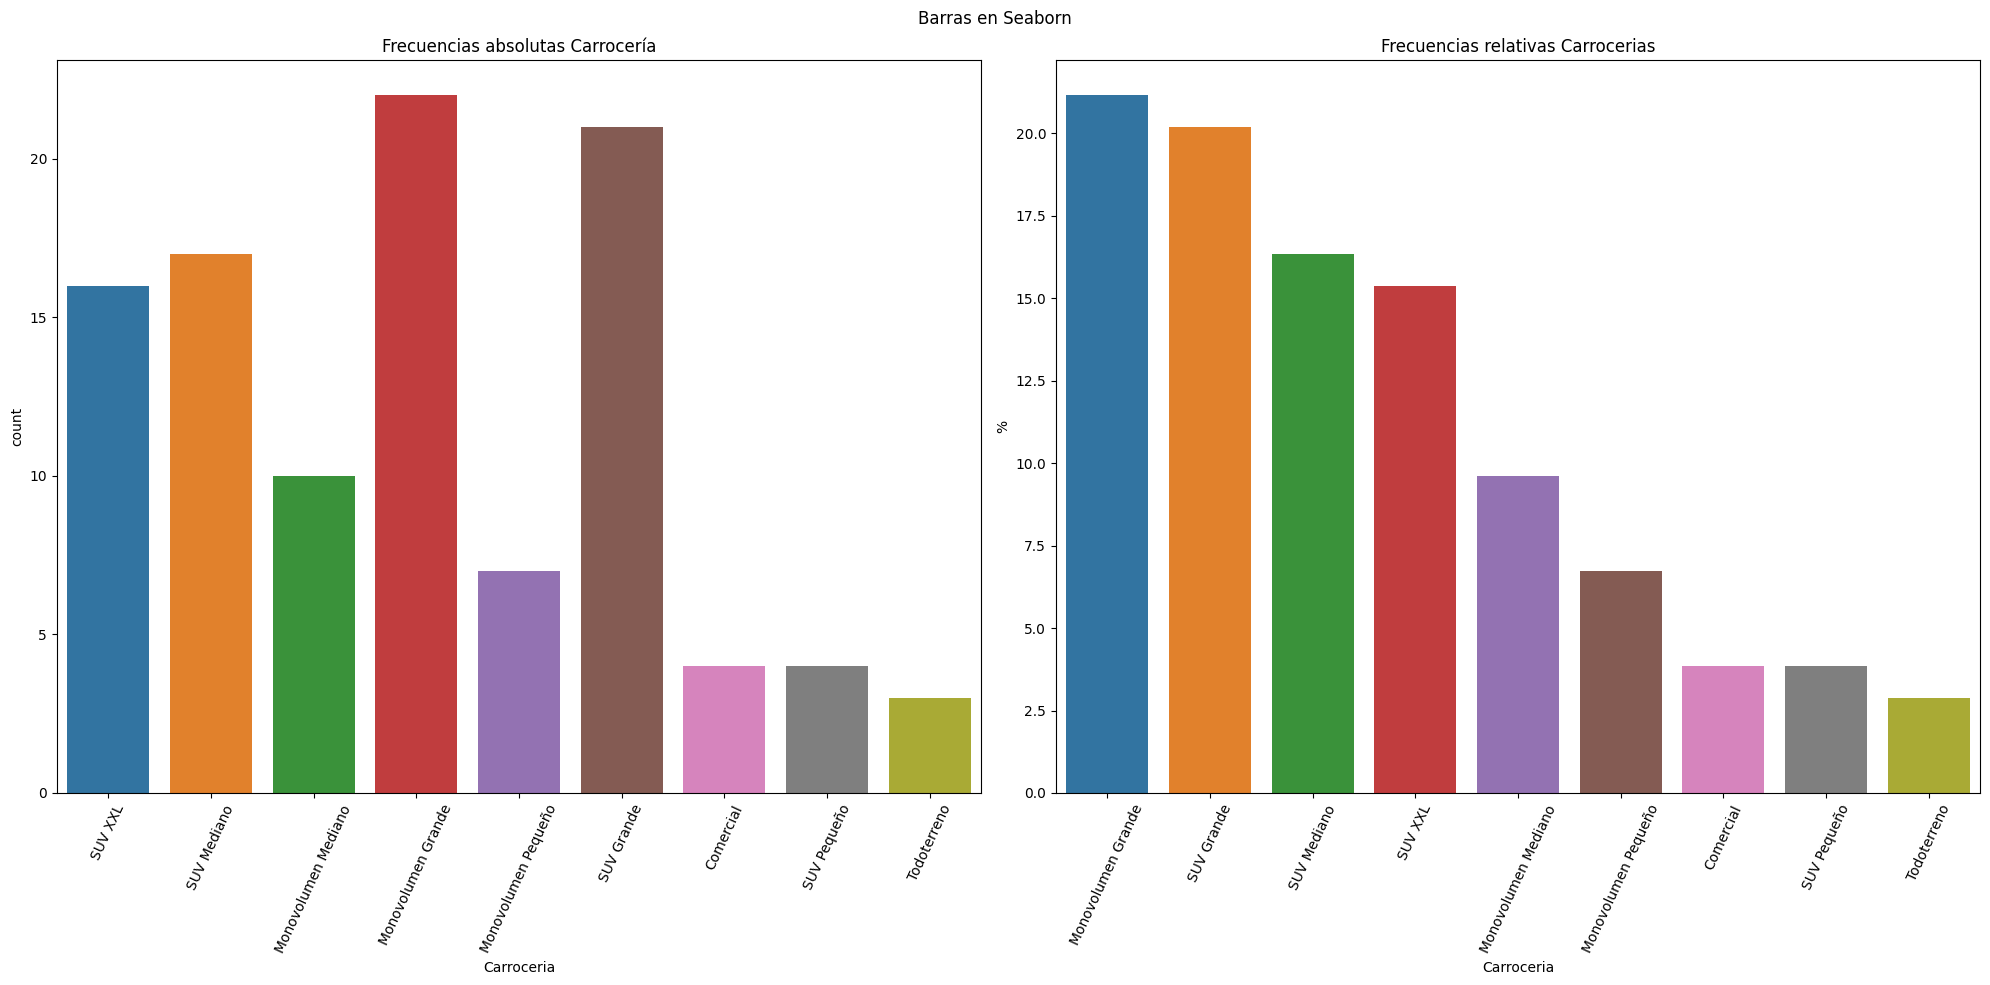

In [15]:
# Vamos a verlo gráficamente (sólo para carroceria e Isofix)
# Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
fig.suptitle("Barras en Seaborn");

# Carrocería
# Frecuencias absolutas
ax = sns.countplot(x= 'Carroceria', data = df_datos, ax = axs[0], hue = "Carroceria", legend= False)
# Obtiene las etiquetas del eje X
labels = ax.get_xticklabels()
# Inclinar las etiquetas
for label in labels:
    label.set_rotation(65)
axs[0].set_title("Frecuencias absolutas Carrocería")
plt.tight_layout()

# Para frecuencias relativas
valores = df_datos.Carroceria.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
plt.xticks(rotation=65) # Inclinar las etiquetas
axs[1].set_title("Frecuencias relativas Carrocerias")
axs[1].set_ylabel("%")
plt.tight_layout()


Text(0, 0.5, '%')

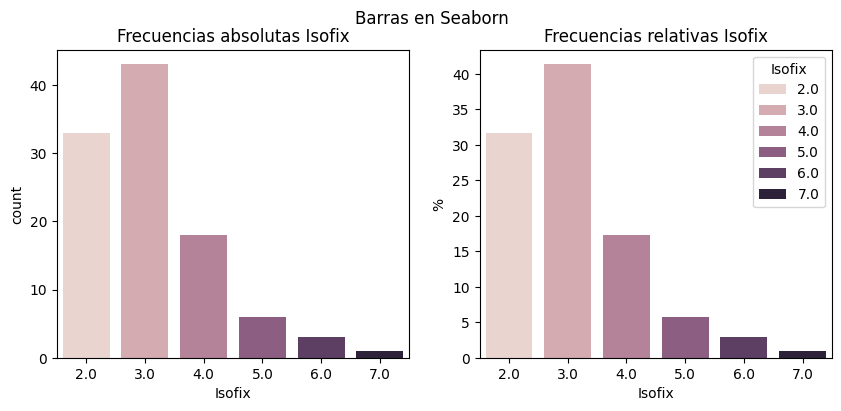

In [16]:
# Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Seaborn");
# Isofix
# Frecuencias absolutas
sns.countplot(x= 'Isofix', data = df_datos, ax = axs[0], hue = "Isofix", legend= False)
axs[0].set_title("Frecuencias absolutas Isofix")

# Para frecuencias relativas
valores = df_datos.Isofix.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas Isofix")
axs[1].set_ylabel("%")


In [17]:
# Medidas de posición
df_datos.describe() # Nos da información de quartiles y percentiles, interesantes para hacer diagramas de cajas

,Unnamed: 0,Largo,Alto,Ancho,Maletero,Isofix,Precio,Valoración
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,51.500000,4.762375,1.777308,1.898442,777.028846,3.096154,49.497154,3.532692
std,30.166206,0.246452,0.113967,0.068453,730.530682,1.065972,27.611182,0.422761
min,0.000000,4.323000,1.570000,1.751000,130.000000,2.000000,13.700000,2.400000
25%,25.750000,4.595000,1.692750,1.848000,414.000000,2.000000,30.208250,3.200000
50%,51.500000,4.759000,1.761500,1.895000,585.000000,3.000000,42.618500,3.600000
75%,77.250000,4.967000,1.882000,1.944500,830.250000,4.000000,60.549750,3.800000
max,103.000000,5.315000,1.990000,2.080000,4100.000000,7.000000,152.124000,4.300000


In [18]:
# Obtengo el IQR de varias variables, nos indica un poco el grado de dispersión de los datos
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

get_IQR (df_datos, 'Largo') # 0,372
get_IQR (df_datos, 'Ancho') # 0,097
get_IQR (df_datos, 'Alto') # 0,189
get_IQR (df_datos, 'Maletero') # 416,25
get_IQR (df_datos, 'Isofix') # 2,0
get_IQR (df_datos, 'Precio') # 30.3141,50
get_IQR (df_datos, 'Valoración') # 0,60



np.float64(0.5999999999999996)

Si el IQR es mucho mayor que la mediana (por ejemplo más de un 50%) podríamos pensar en una variable con valores bastante dispersos (y por tanto las medidas de tendencia central hay que considerarlas con más cuidado)
Podemos comparar el IQR con la diferencia entre valor máximo y mínimo (lo que veremos en un momento que es el rango) y si el IQR es comparable entonces de nuevo podremos hablar de una variable dispersa.


En nuestro caso, vemos que en el caso de alto, ancho, largo, isofix y valoracion,  no es nada elevado este IQR y no es mayor que la mediana, con lo que son variables poco dispersas.
En el caso del maletero, está por debajo de la media, pero hay mucha diferncia entre min y max (supongo de nuevo que es debido a la carrocería del vehículo), se puede considerar variable dispersa. Y en el caso del precio, tambien está por debajo de la media, pero vuelve a hacer grandes diferncias entre max y min.

In [19]:
# Vamos a ver estas variables graficamente
numericas = ['Alto', 'Ancho', 'Largo', 'Maletero', 'Isofix', 'Precio', 'Valoración']

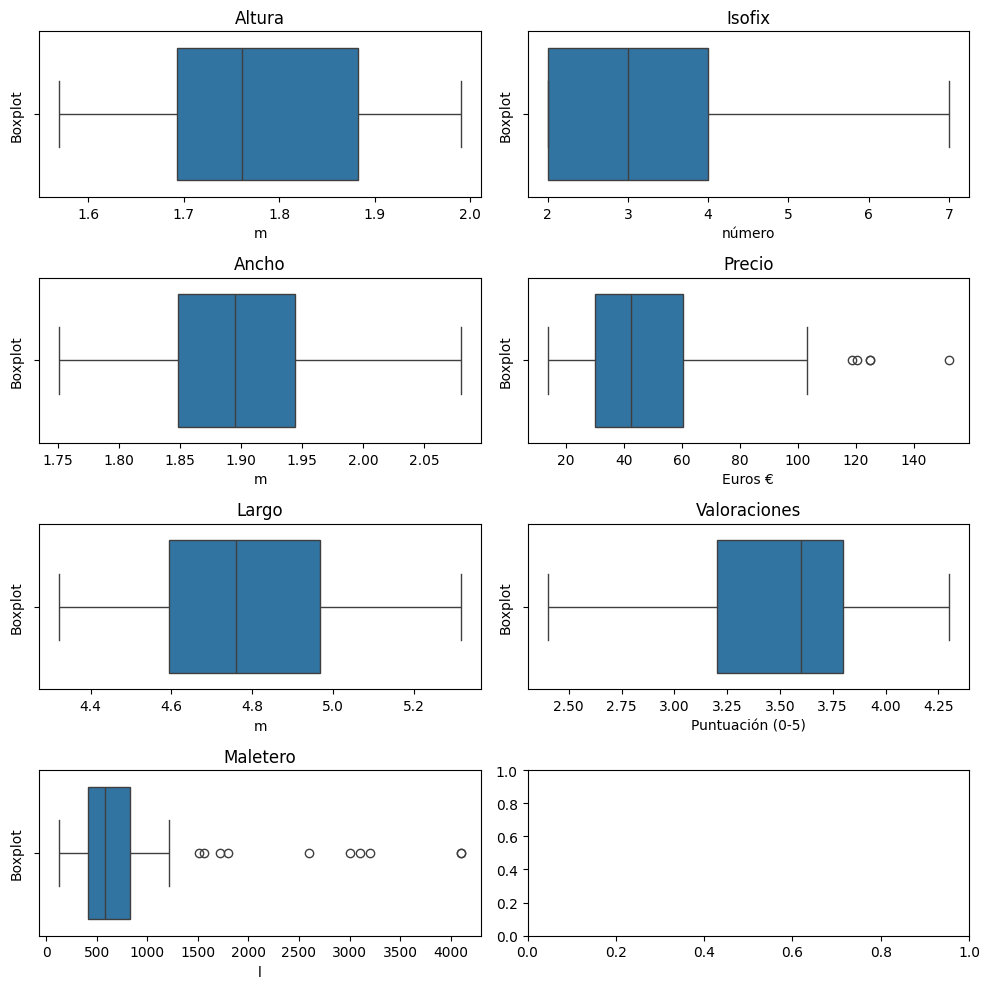

In [20]:
fig,axs = plt.subplots(4,2,figsize= (10,10))
sns.boxplot(x = 'Alto', data = df_datos, ax = axs[0,0])
axs[0,0].set_title('Altura')
axs[0,0].set_xlabel('m')
axs[0,0].set_ylabel('Boxplot')
plt.tight_layout()

sns.boxplot(x = 'Ancho', data = df_datos, ax = axs[1,0])
axs[1,0].set_title('Ancho')
axs[1,0].set_xlabel('m')
axs[1,0].set_ylabel('Boxplot')
plt.tight_layout()

sns.boxplot(x = 'Largo', data = df_datos, ax = axs[2,0])
axs[2,0].set_title('Largo')
axs[2,0].set_xlabel('m')
axs[2,0].set_ylabel('Boxplot')
plt.tight_layout()

sns.boxplot(x = 'Maletero', data = df_datos, ax = axs[3,0])
axs[3,0].set_title('Maletero')
axs[3,0].set_xlabel('l')
axs[3,0].set_ylabel('Boxplot')
plt.tight_layout()

sns.boxplot(x = 'Isofix', data = df_datos, ax = axs[0,1])
axs[0,1].set_title('Isofix')
axs[0,1].set_xlabel('número')
axs[0,1].set_ylabel('Boxplot')
plt.tight_layout()

sns.boxplot(x = 'Precio', data = df_datos, ax = axs[1,1])
axs[1,1].set_title('Precio')
axs[1,1].set_xlabel('Euros €')
axs[1,1].set_ylabel('Boxplot')
plt.tight_layout()

sns.boxplot(x = 'Valoración', data = df_datos, ax = axs[2,1])
axs[2,1].set_title('Valoraciones')
axs[2,1].set_xlabel('Puntuación (0-5)')
axs[2,1].set_ylabel('Boxplot')
plt.tight_layout()


Como ya sospechaba, en los que hay más dispersión de datos es en el precio y el maletero. Veremos cuando los comparemos con las carrocerias

In [21]:
# Vamos con las medidas de dispersión
# Variables numéricas
df_datos.describe().loc[["std", "mean"]].T

,std,mean
Unnamed: 0,30.166206,51.500000
Largo,0.246452,4.762375
Alto,0.113967,1.777308
Ancho,0.068453,1.898442
Maletero,730.530682,777.028846
Isofix,1.065972,3.096154
Precio,27.611182,49.497154
Valoración,0.422761,3.532692


In [22]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

variabilidad(df_datos)

,std,mean,CV
Unnamed: 0,30.166206,51.500000,0.585752
Largo,0.246452,4.762375,0.051750
Alto,0.113967,1.777308,0.064123
Ancho,0.068453,1.898442,0.036058
Maletero,730.530682,777.028846,0.940159
Isofix,1.065972,3.096154,0.344289
Precio,27.611182,49.497154,0.557834
Valoración,0.422761,3.532692,0.119671


Un CV menor al 15% suele considerarse como una baja variabilidad.
Un CV entre 15% y 30% indica una variabilidad moderada.
Un CV mayor al 30% a menudo se considera como una alta variabilidad.

Con estos datos seguimos poniendo de manifiesto que tanto maletero como precios hay que tratarlas con precaución.
De hecho en los boxplots salen algunos outliers, que habrá que ver porqué se dan.

In [23]:
# Voy a darle una vuelta a las variables numéricas : plazas, etiquetas, combustible y potencia. (Todas discretas, salvo potencia que es contínua)
# Para este tipo de variables voy a tratarlas como si fueran categóricas, ya que aunque se considen numéricas, no puedo operar con ellas
categoricas_numericas = ['Plazas', 'Etiqueta', 'Combustible', 'Potencia']
# Empiezo calculando la moda
df_datos[categoricas_numericas].mode()


,Plazas,Etiqueta,Combustible,Potencia
0,7,"[' Eco', ' C', ' Zero']",[' Diesel'],136 CV


In [24]:
# Calculamos las frecuencias tanto relativas como absolutas de las variables
for catego in categoricas_numericas:
    print(f" Para {catego}")
    print(df_datos[catego].value_counts())
    print("\n"*2)

 Para Plazas
Plazas
7                        51
5 y 7                    26
5                         7
8                         5
5 y 6 y 7 y 8 y 9         2
5 y 7 y 8                 2
5 y 6 y 7 y 8             2
9                         2
9 y 8                     2
6 y 7                     1
5 y 6                     1
5 y 6 y 7                 1
2 y 3 y 5 y 6 y 7 y 9     1
6 y 9 y 8                 1
Name: count, dtype: int64



 Para Etiqueta
Etiqueta
[' Eco', ' C', ' Zero']     24
[' Eco', ' Zero']           18
[' Zero']                   15
[' Eco', ' C']              14
[' C']                      14
[' C', ' Zero']              9
[' C', ' Eco', ' Zero']      5
[' C', ' Eco']               3
[' C', ' Eco', ' Zero',]     1
[' Eco']                     1
Name: count, dtype: int64



 Para Combustible
Combustible
[' Diesel']                                                   21
[' Eléctrico']                                                18
['PHEV Gasolina']                   

Viendo los resultados, parece que claramente la moda acierta en las plazas, en las etiquetas, en el combustible (aunque con poca diferencia con el segundo), y en cuanto a la potencia hay que cogerlo con pinzas, ya que sólo hay un punto de diferencia con el segundo y luego son rangos de potencia.

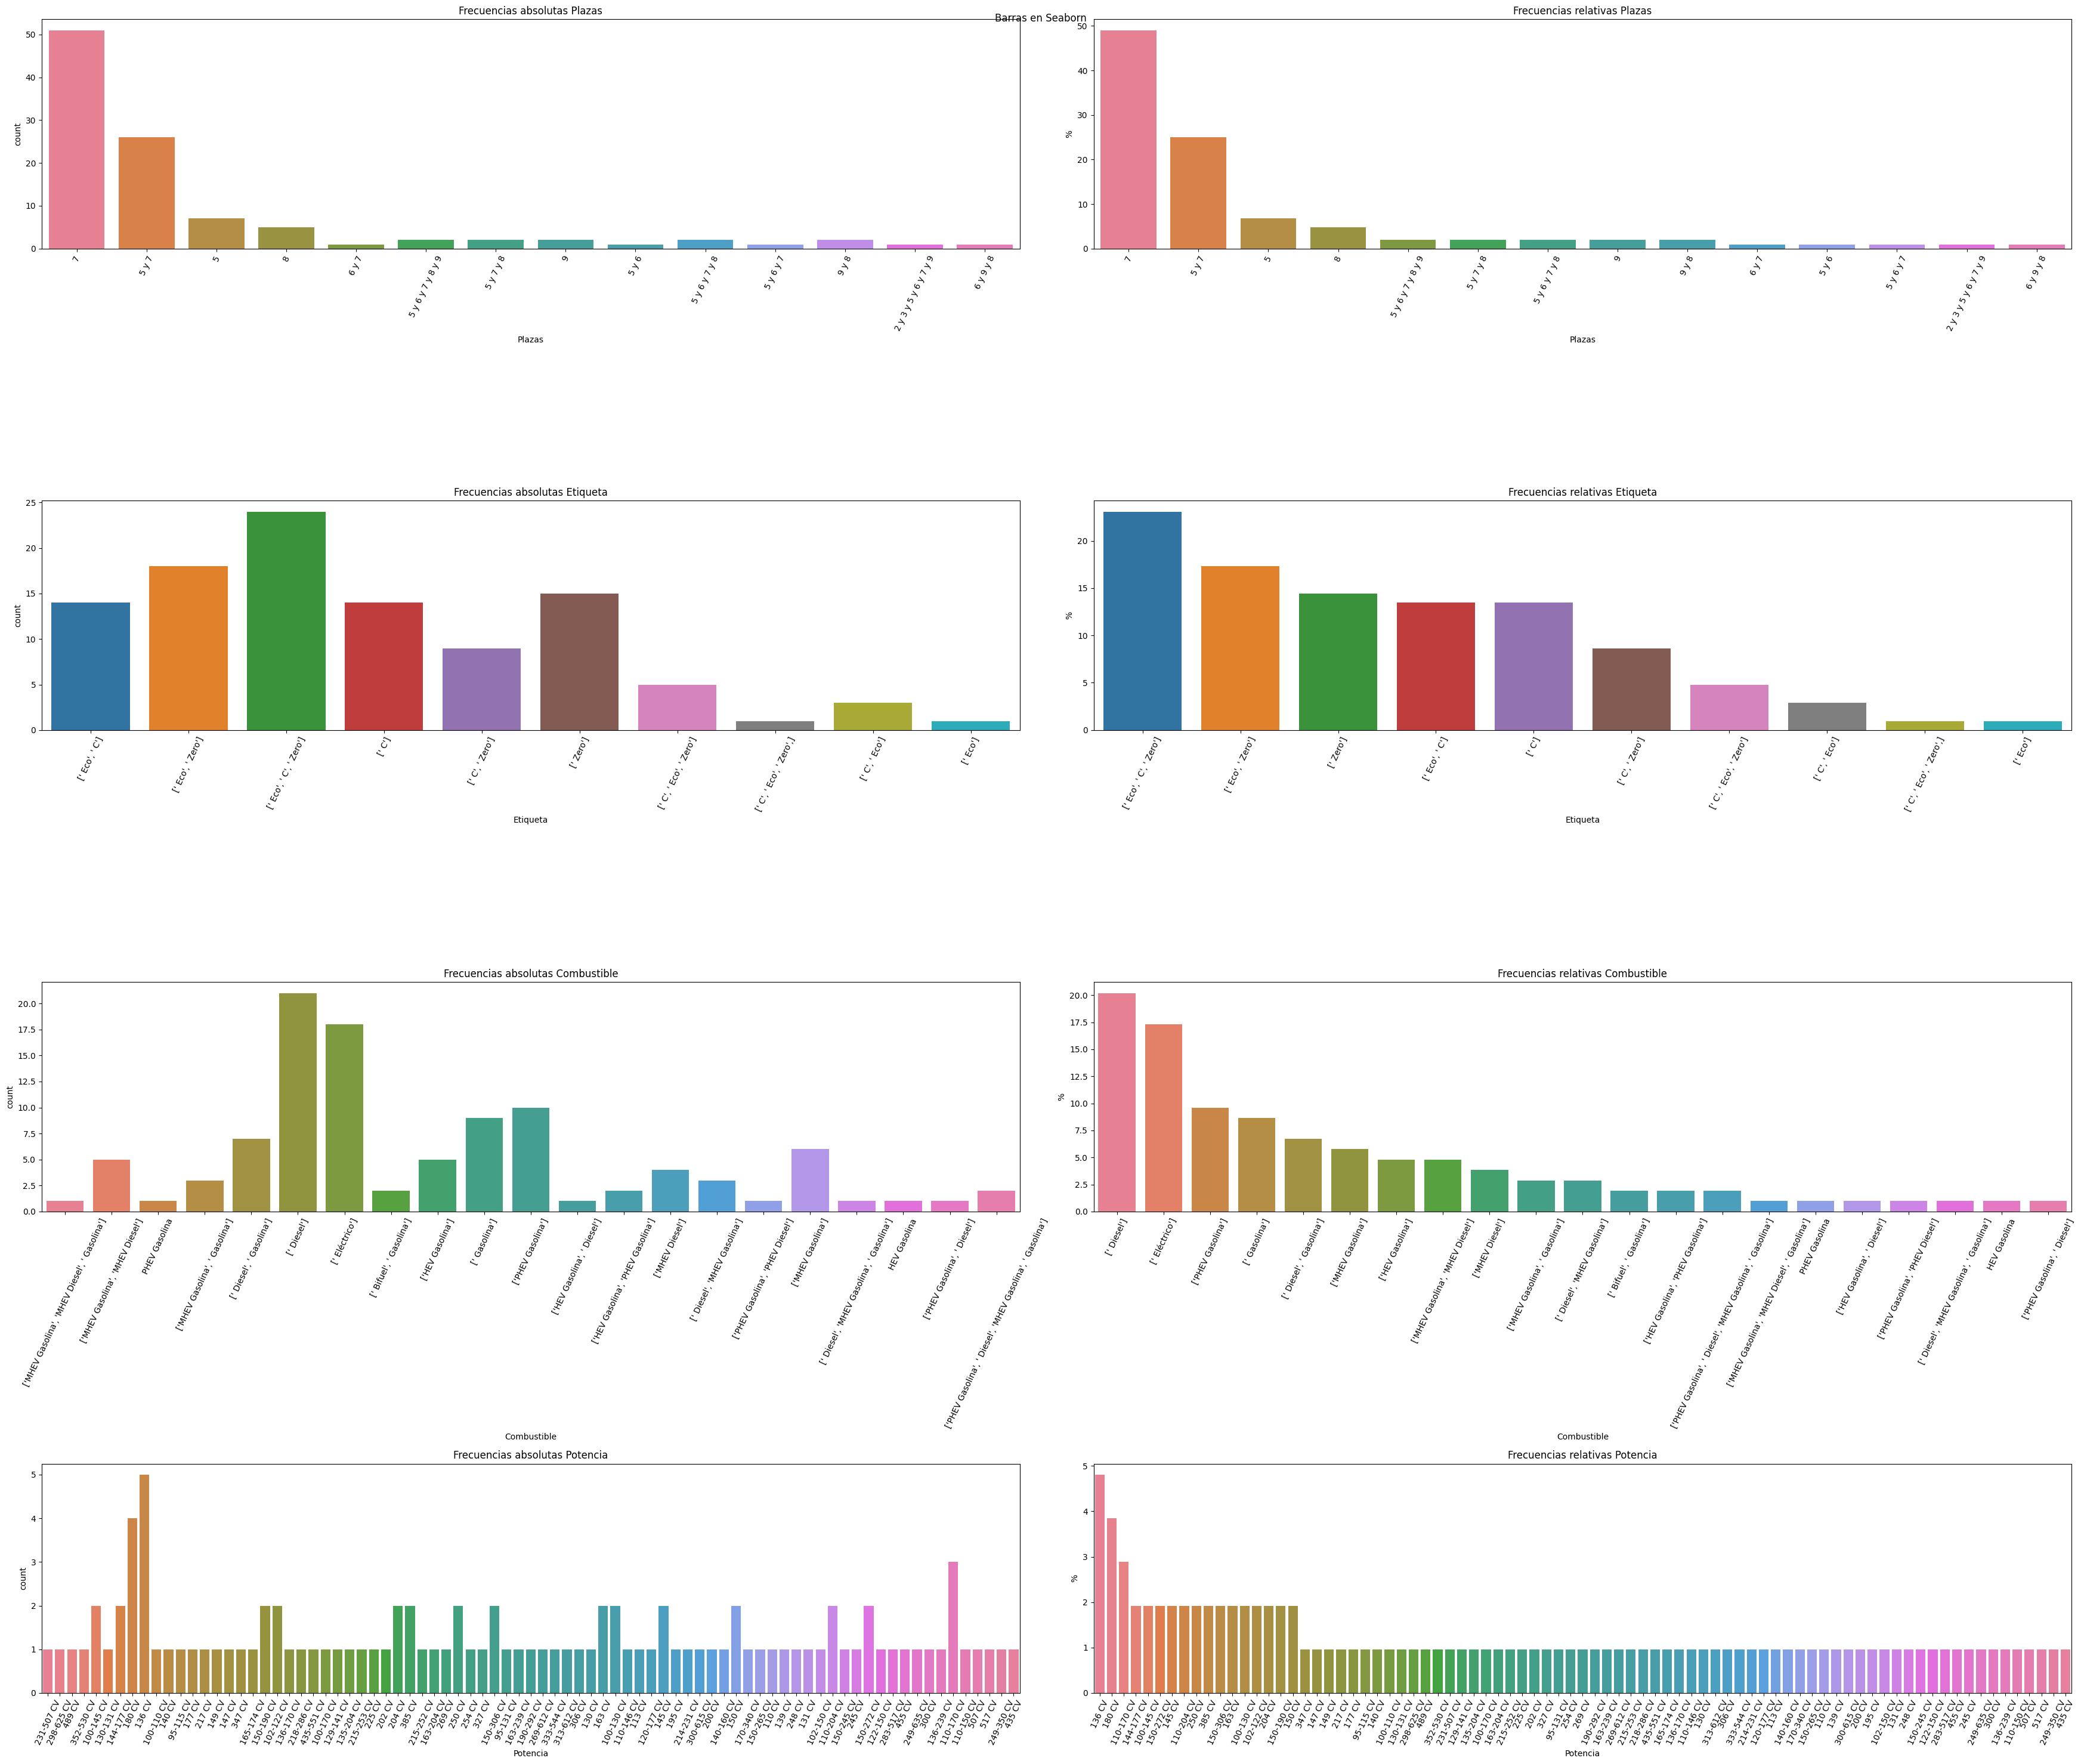

In [25]:
# Vamos a verlo gráficamente 
# Creamos figura y axes
fig,axs = plt.subplots(nrows=4,ncols=2, figsize=(35,30))
fig.suptitle("Barras en Seaborn");

# Plazas
# Frecuencias absolutas
ax = sns.countplot(x= 'Plazas', data = df_datos, ax = axs[0,0], hue = "Plazas", legend= False)
# Obtiene las etiquetas del eje X
labels = ax.get_xticklabels()
# Inclinar las etiquetas
for label in labels:
    label.set_rotation(65)
axs[0,0].set_title("Frecuencias absolutas Plazas")
plt.tight_layout()

# Para frecuencias relativas
valores = df_datos.Plazas.value_counts(normalize = True) * 100
ax = sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[0,1])
ax.tick_params(axis='x', rotation=65) # Inclinar las etiquetas
axs[0,1].set_title("Frecuencias relativas Plazas")
axs[0,1].set_ylabel("%")
plt.tight_layout()


# Etiquetas
# Frecuencias absolutas
ax = sns.countplot(x= 'Etiqueta', data = df_datos, ax = axs[1,0], hue = "Etiqueta", legend= False)
# Obtiene las etiquetas del eje X
labels = ax.get_xticklabels()
# Inclinar las etiquetas
for label in labels:
    label.set_rotation(65)
axs[1,0].set_title("Frecuencias absolutas Etiqueta")


# Para frecuencias relativas
valores = df_datos.Etiqueta.value_counts(normalize = True) * 100
ax = sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1,1])
ax.tick_params(axis='x', rotation=65)  # Inclinar las etiquetas
axs[1,1].set_title("Frecuencias relativas Etiqueta")
axs[1,1].set_ylabel("%")
plt.tight_layout()


# Combustible
# Frecuencias absolutas
ax = sns.countplot(x= 'Combustible', data = df_datos, ax = axs[2,0], hue = "Combustible", legend= False)
# Obtiene las etiquetas del eje X
labels = ax.get_xticklabels()
# Inclinar las etiquetas
for label in labels:
    label.set_rotation(65)
axs[2,0].set_title("Frecuencias absolutas Combustible")


# Para frecuencias relativas
valores = df_datos.Combustible.value_counts(normalize = True) * 100
ax = sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2,1])
ax.tick_params(axis='x', rotation=65)  # Inclinar las etiquetas
axs[2,1].set_title("Frecuencias relativas Combustible")
axs[2,1].set_ylabel("%")
plt.tight_layout()


# Potencia
# Frecuencias absolutas
ax = sns.countplot(x= 'Potencia', data = df_datos, ax = axs[3,0], hue = "Potencia", legend= False)
# Obtiene las etiquetas del eje X
labels = ax.get_xticklabels()
# Inclinar las etiquetas
for label in labels:
    label.set_rotation(65)
axs[3,0].set_title("Frecuencias absolutas Potencia")


# Para frecuencias relativas
valores = df_datos.Potencia.value_counts(normalize = True) * 100
ax = sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[3,1])
ax.tick_params(axis='x', rotation=65)  # Inclinar las etiquetas
axs[3,1].set_title("Frecuencias relativas Potencia")
axs[3,1].set_ylabel("%")
plt.tight_layout()
plt.show()

La verdad que a nivel gráfico si que tanto en plazas como en etiquetas podemos ver lo que se plantea en los resultados, pero en cuanto al combustible y la potencia, la variabilidad de datos es muy alta. Puede ser debido a que ambas variables estén relacionadas, ya que los combustibles varian también según los tipos de motores.(híbridos, medio hibridos, hay muchas posibilidades...)

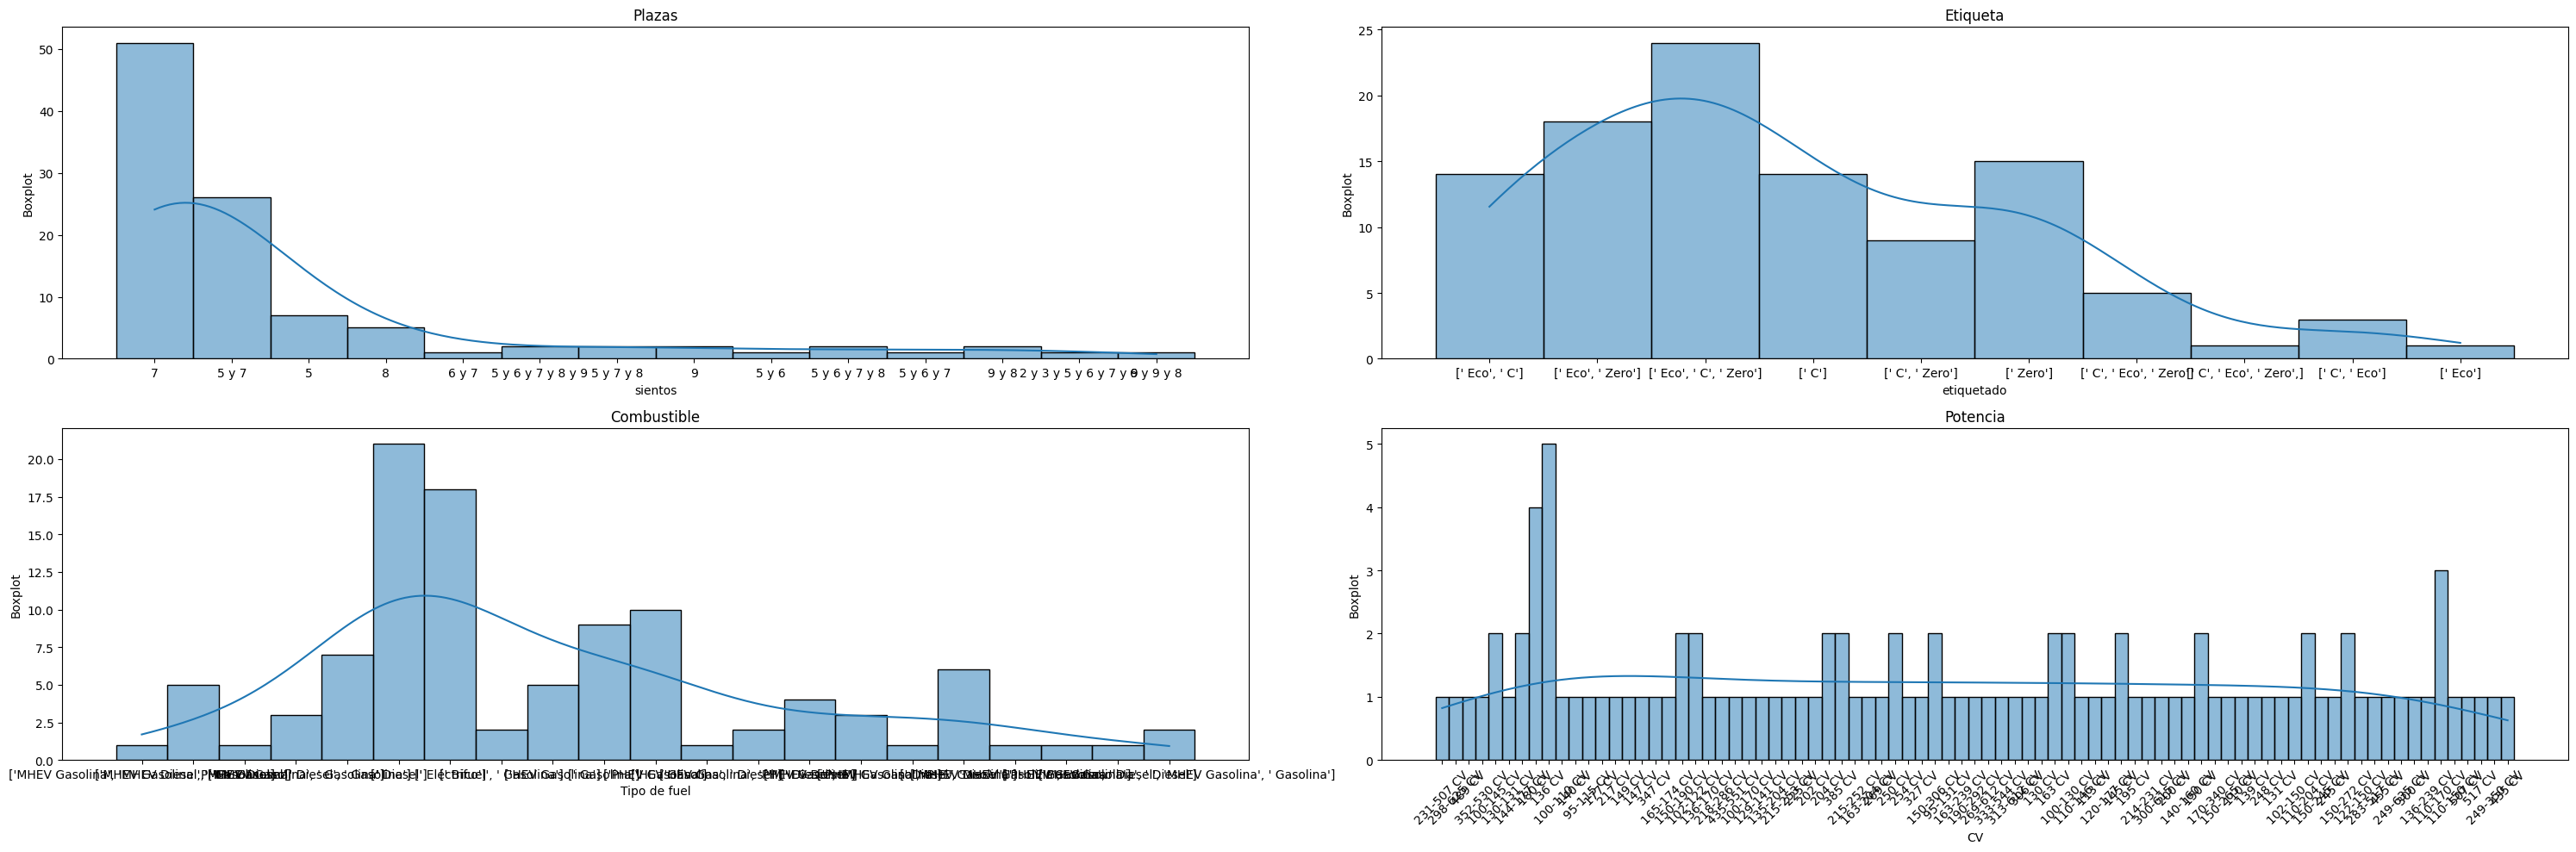

In [26]:
# Voy a usar histogramas con KDE (estmación de densidad)
fig,axs = plt.subplots(2,2,figsize= (30,10))
sns.histplot(x = 'Plazas', data = df_datos, kde = True, ax = axs[0,0])
# height controla la altura del gráfico)
plt.xticks(rotation=45)
axs[0,0].set_title('Plazas')
axs[0,0].set_xlabel('sientos')
axs[0,0].set_ylabel('Boxplot')
plt.tight_layout()

sns.histplot(x = 'Etiqueta', data = df_datos, kde = True, ax = axs[0,1])
plt.xticks(rotation=45)
axs[0,1].set_title('Etiqueta')
axs[0,1].set_xlabel('etiquetado')
axs[0,1].set_ylabel('Boxplot')
plt.tight_layout()

sns.histplot(x = 'Combustible', data = df_datos, kde = True, ax = axs[1,0])
axs[1,0].set_title('Combustible')
plt.xticks(rotation=45)
axs[1,0].set_xlabel('Tipo de fuel')
axs[1,0].set_ylabel('Boxplot')
plt.tight_layout()

sns.histplot(x = 'Potencia', data = df_datos, kde = True, ax = axs[1,1])
plt.xticks(rotation=45)
axs[1,1].set_title('Potencia')
axs[1,1].set_xlabel('CV')
axs[1,1].set_ylabel('Boxplot')
plt.tight_layout()


In [27]:
# La verdad que por sí solas siguen sin aportar muchos datos, solo que son tremendamente dispersas estas 4 variables, que están relacionadas con el tipo de vehículo su motor, y los combustibles.

### Resumen del análisis univariante:
- La variable carrocería puede ser un buen índice del Dataframe y además sospecho que una de las variables principales con las que voy a tener que hacer muchas comparaciones.
- La otra variable categórica que nos puede interesar es la del número de isofix, no tiene una gran dispersión. Además parece que la mayoría de vehículos tienen 2 ó 3 isofix. Debo ver si el resto de valores está relacionado con el tipo de vehículo, aunque sospecho que tendrá más relación con el número de plazas (creo que es bastante lógico, puede que a más número de plazas, más isofix)
- En cuanto a las variables numéricas, en general son valores sin mucha dispersión, salvo maletero y precios, que sí tienen una alta variabilidad y además presentan outliers. Debo considerarlas conjuntamente con la variable carrocería ya que es posible que tengan cierta relación.
- El resto de variables numéricas (potencia, Etiquetas, combustible y motor), por sí solas no aportan mucho, tienen bastante dispersión y sospecho que se debe a que están relacionadas con otras variables.

### Análisis Bivariante

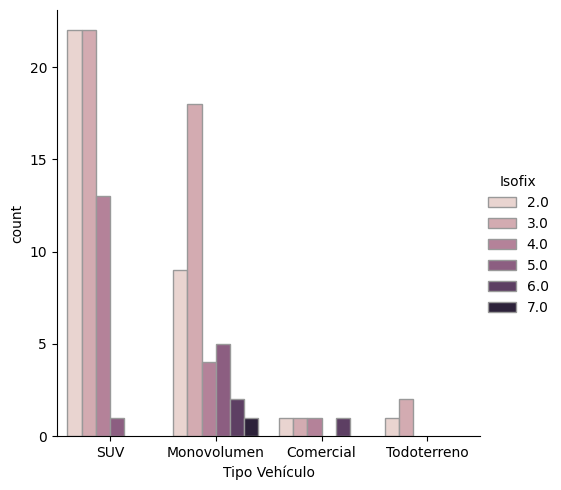

In [28]:
# Voy a empezar con las categóricas
# Como únicamente me interesan la carrocería y los isofix, voy a ello.
# Primero voy a agrupar las carrocerías por clases (SUV, Monovolumen, Comercial y Todoterreno)
# Creo una función para "reclasificar los vehículos"
def clasificacion_vehiculo (elemento):
    carroceria = elemento.Carroceria.upper()
    if 'SUV' in carroceria:
        return 'SUV'
    elif 'MONOVOLUMEN' in carroceria:
        return 'Monovolumen'
    elif 'TODOTERRENO' in carroceria:
        return 'Todoterreno'
    else:
        return 'Comercial'

 # Aplico la función
df_datos['Tipo Vehículo'] = df_datos.apply(clasificacion_vehiculo, axis=1)    

# Ahora ya empiezo a hacer las gráficas
sns.catplot( x= "Tipo Vehículo", 
            hue = "Isofix",
            kind= "count", # me permite diferentes tipos de graficas sobre variables categoricas
            edgecolor = ".6",
            orient = "h",
            data = df_datos.sort_values("Isofix"));

In [29]:
# Parece que en los suv prevalencen los vehiculos con 2 y 3 isofix. En los monovolumen los de 3, en el Comercia hay un poco de todo y en el todotereno 3 y 2.

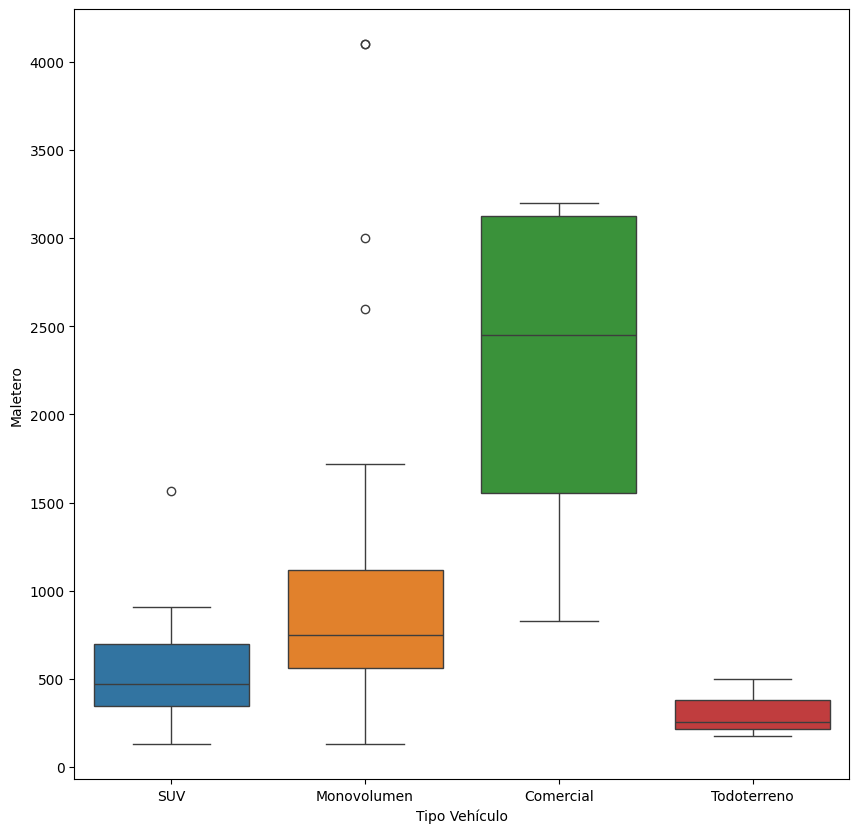

In [30]:
# Ahora ya empiezo a hacer las gráficas comparando lo que me interesa (Tipo de vehiculos y maleteros)
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Maletero",
            hue = "Tipo Vehículo",
            data=df_datos);

In [ ]:
# Existen algunos otliers tanto en los sub, como en las monovolúmenes (debo echarles un ojo por si fueran errores), pero en general las monovolumenes tienen más capacidad de maletero que los suv (probablemente por el tamaño del vehíulo). Los Todoterrenos son más limitados y las comerciales obviamente se disparan.

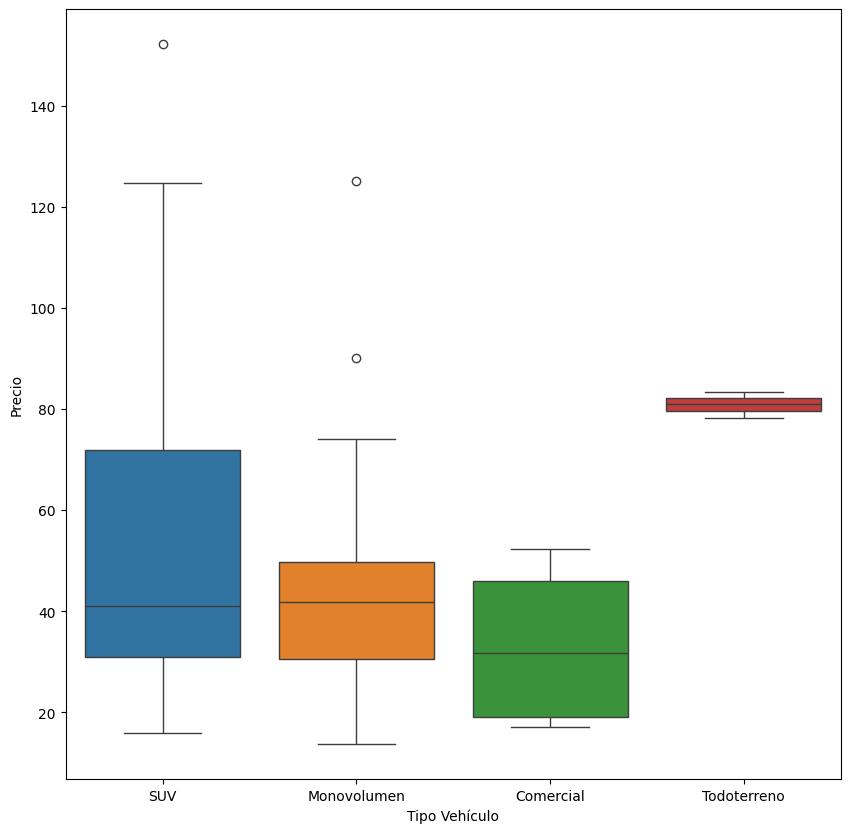

In [32]:
# Ahora ya empiezo a hacer las gráficas comparando lo que me interesa (Tipo de vehiculos y precios)
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Precio",
            hue = "Tipo Vehículo",
            data=df_datos);

In [33]:
# Los vehiculos más caros son los suv y los todoterreno, aunque en general la media estaría en torno a algo más de 40000. Siendo los más baratos los vehículos comerciales.

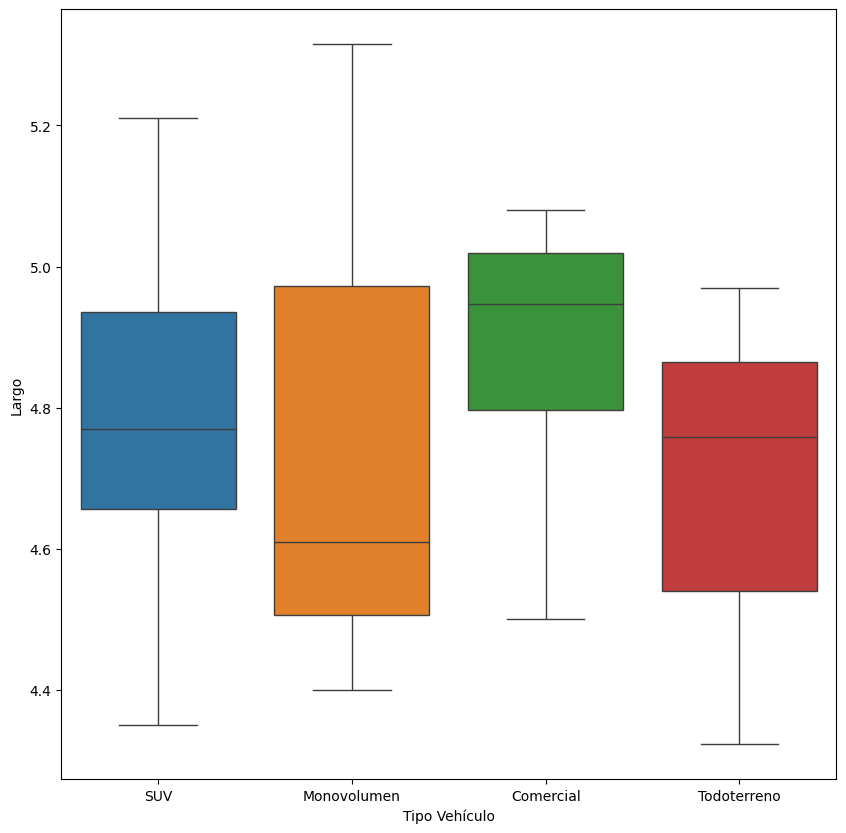

In [34]:
# En la misma línea voy a comparar los tipos de vehiculos con las longitudes
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Largo",
            hue = "Tipo Vehículo",
            data=df_datos);

In [35]:
# Tanto los suv como los monovolumen están en su mayoria por debajo de los 5m (dato relevante en función de las medidas de un garaje estandar : 5m x 2.5m), por lo que salvo casos excepcionales podríamos meterlos en dichas plazas

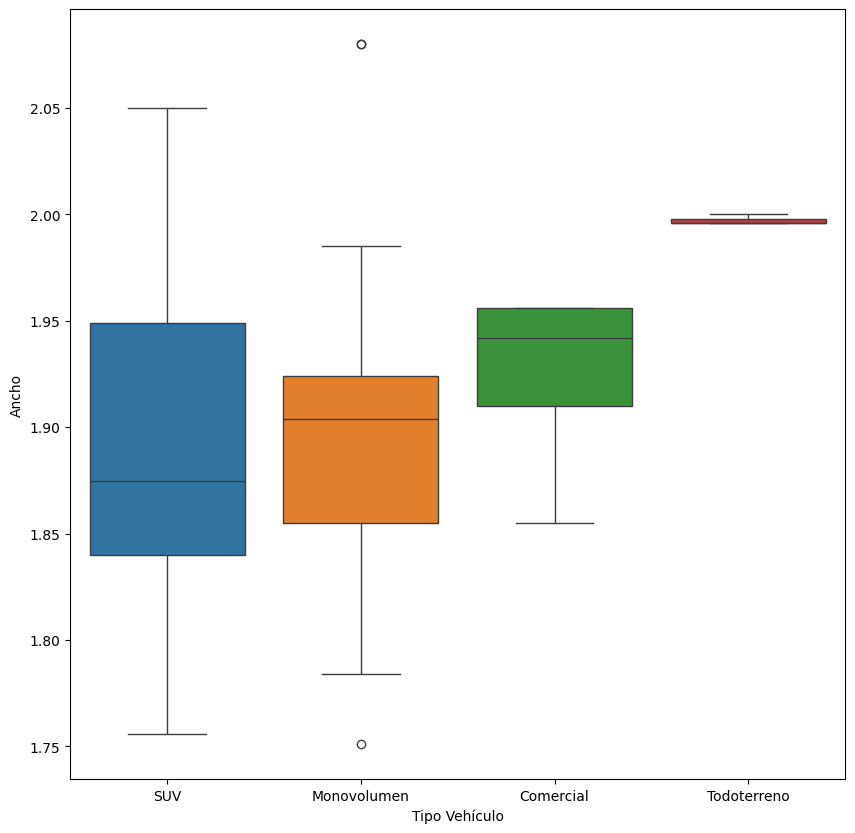

In [36]:
# En la misma línea voy a comparar los tipos de vehiculos con los anchos.
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Ancho",
            hue = "Tipo Vehículo",
            data=df_datos);

In [37]:
# Salvo los todoterreno que si están más cerca de los 2m de ancho, el resto en general anda por debajo (por lo que por medidas, salvo excepciones, cualquier suv o monovolumen se pueden adecuar a nuestra plaza de garaje standar)

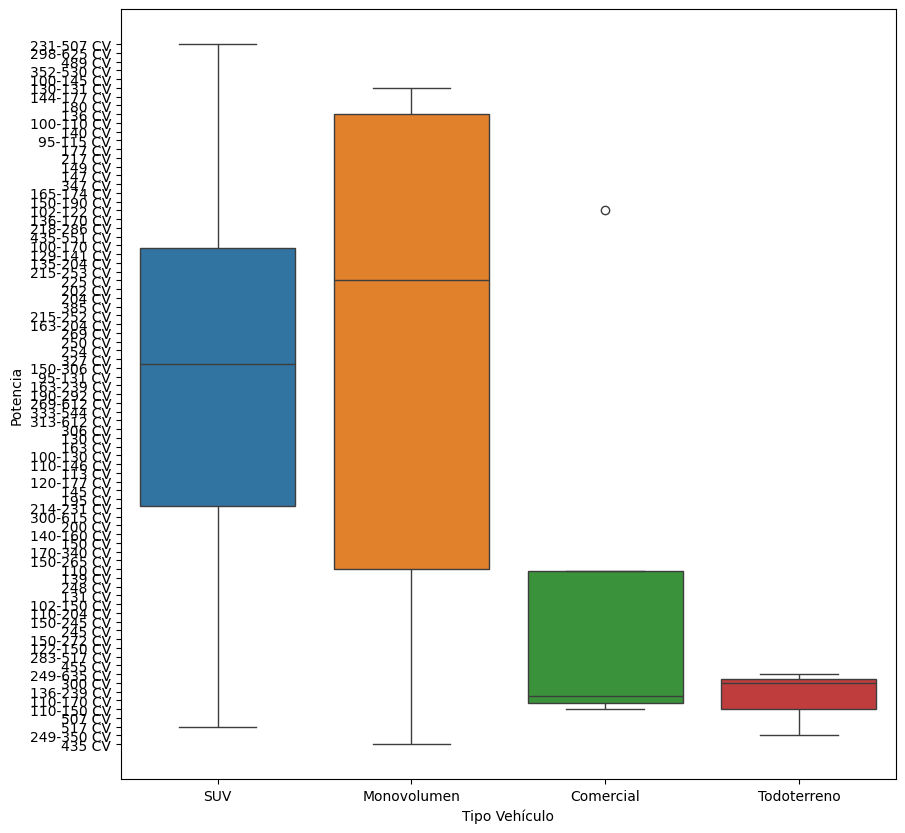

In [38]:
# Comparativa del tipo de vehículo con potencia
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Potencia",
            hue = "Tipo Vehículo",
            data=df_datos);

In [39]:
# La verdad que esta gráfica no me dice mucho salvo que parece que los que mayor rango de potencia tienen son los monovolúmenes y los suv

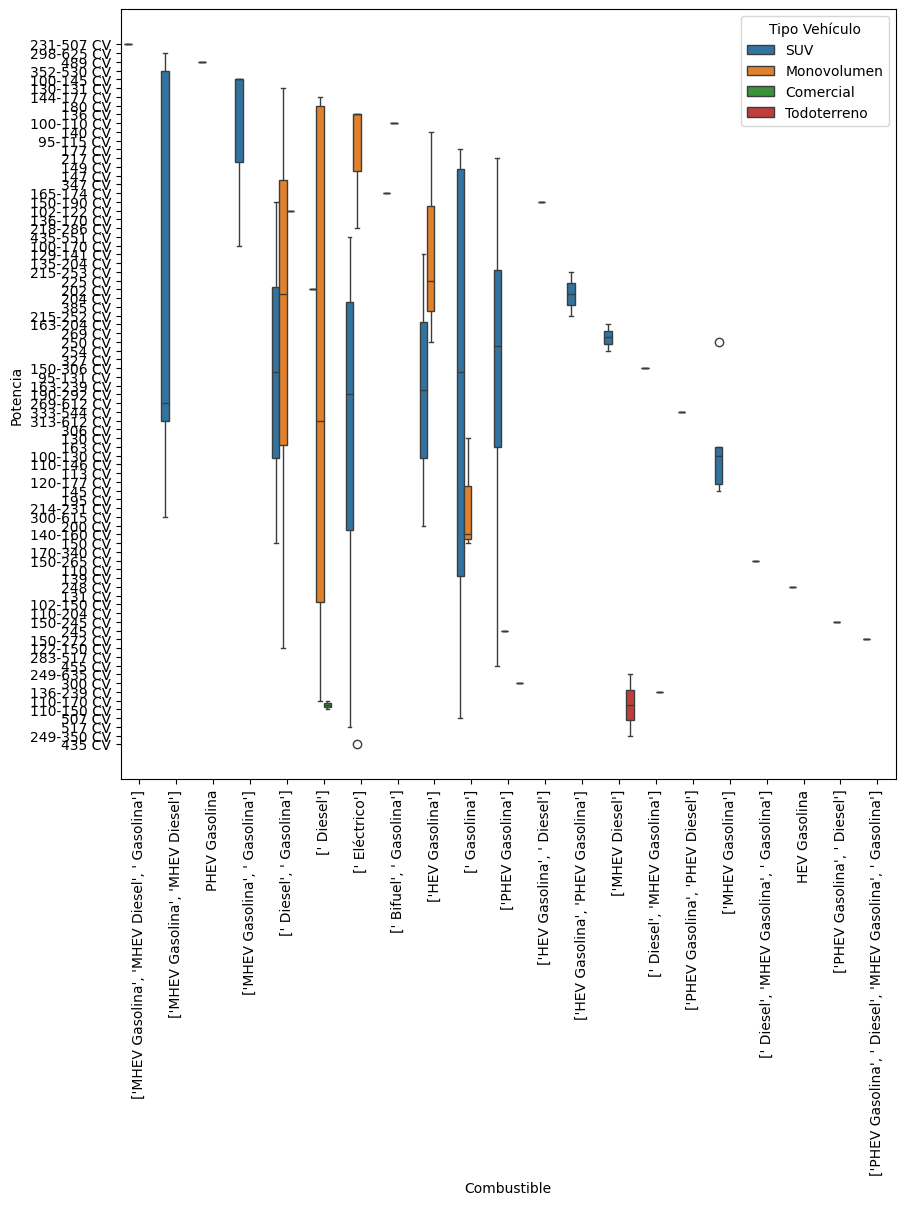

In [40]:
# Voy a aprovechar y comparar las potencias con los combustibles y los tipos de vehículos
plt.figure(figsize=(10,10))
sns.boxplot(x = "Combustible",
            y = "Potencia",
            hue = "Tipo Vehículo",
            data=df_datos)
plt.xticks(rotation=90);

In [41]:
# Aparentemente los vehículos comerciales son principalmente diesel y su potencia está en torn a 110-170CV
# Los todoterrenos tienen motorres MHEV(mild hybrid electric vehicle) diesel con potencia entorno a los 150-170 CV de media, aunque los hay bastante potentes
# En cuanto a los SUV sus combustibles y potencias son diversos y variados. En cambio las monovolumen se centran en diesel, gasolina, algún electrico y algún Hibrido gasolina. Sus potencias son bastante variadas

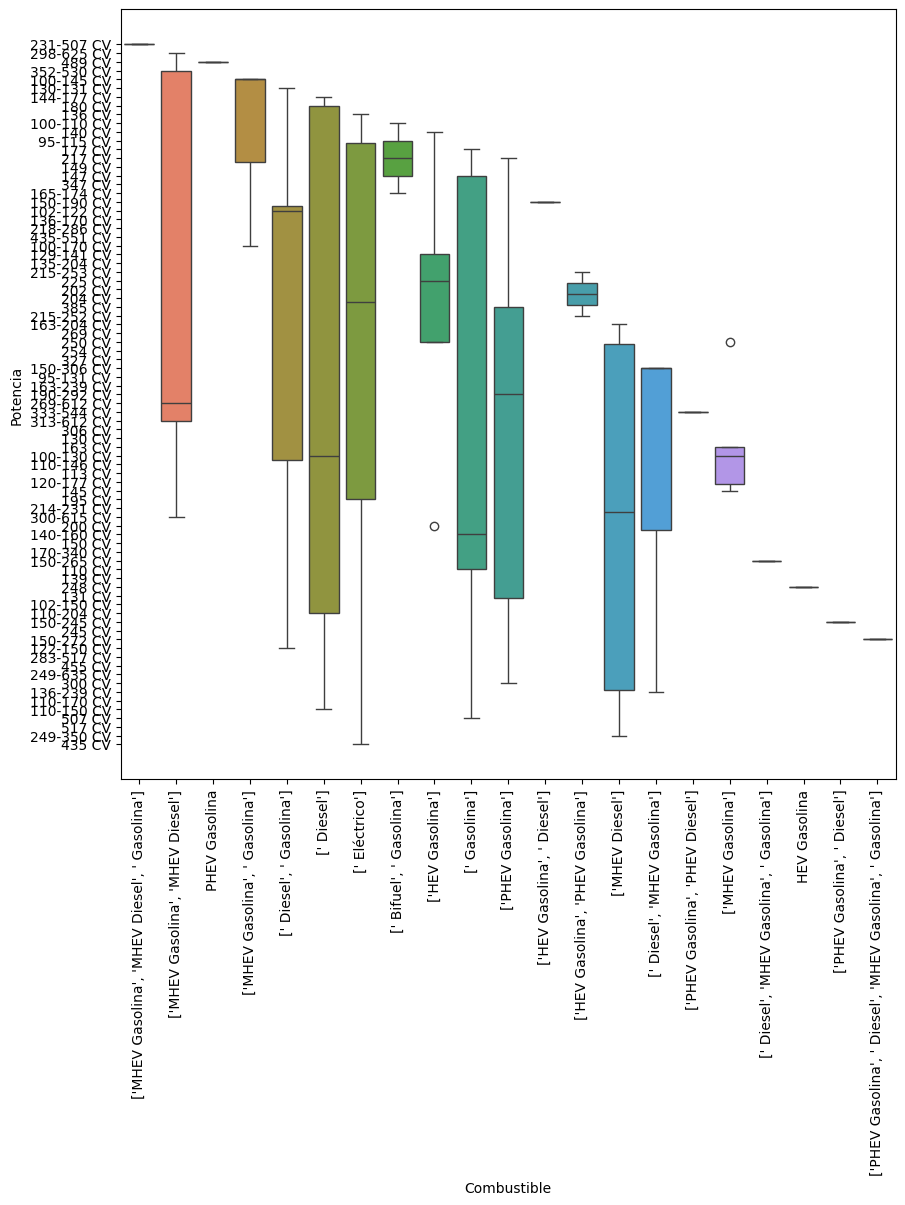

In [42]:
# Visualización del combustible frente a la potencia
plt.figure(figsize=(10,10))
sns.boxplot(x = "Combustible",
            y = "Potencia",
            hue = "Combustible",
            data=df_datos)
plt.xticks(rotation=90);

In [ ]:
# Parece que si hay realación entre las potencias y el tipo de combustible, pero es dificil. Habría que acotar más los tipos de combustibles. 
# En nuestro caso particular, nos interesa un vehículo a priori Bifuel (GLP, gasolina) por el uso que le vamos a dar. Y en este caso parece que no son especialmente potentes, o al menos su rango es más reducido

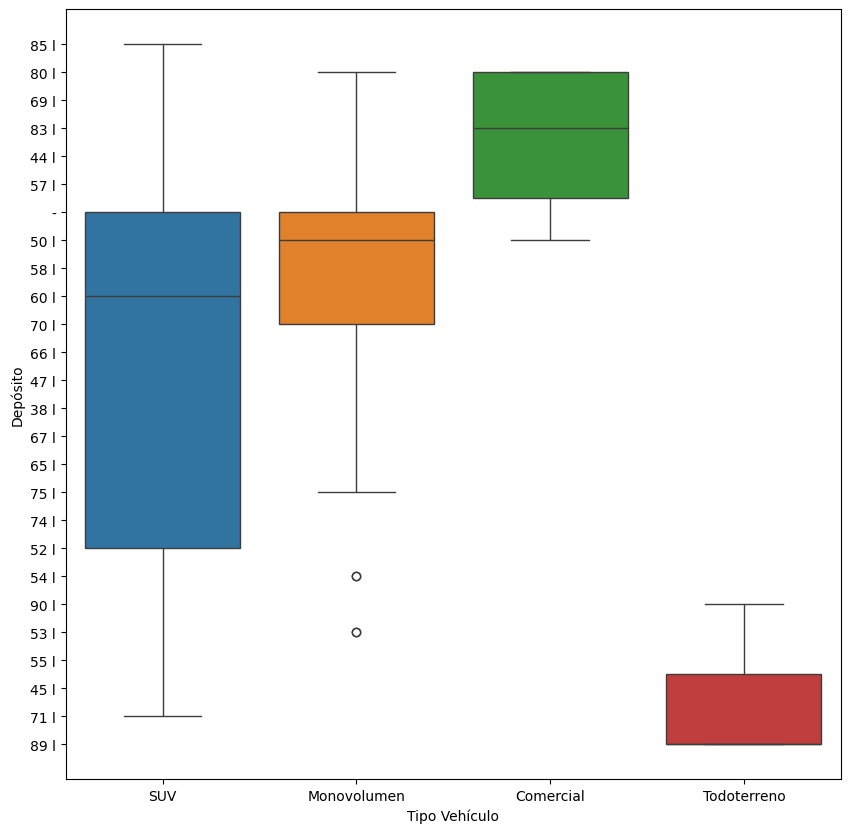

In [44]:
# Tipo de vehículo con depósito
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Depósito",
            hue = "Tipo Vehículo",
            data=df_datos);

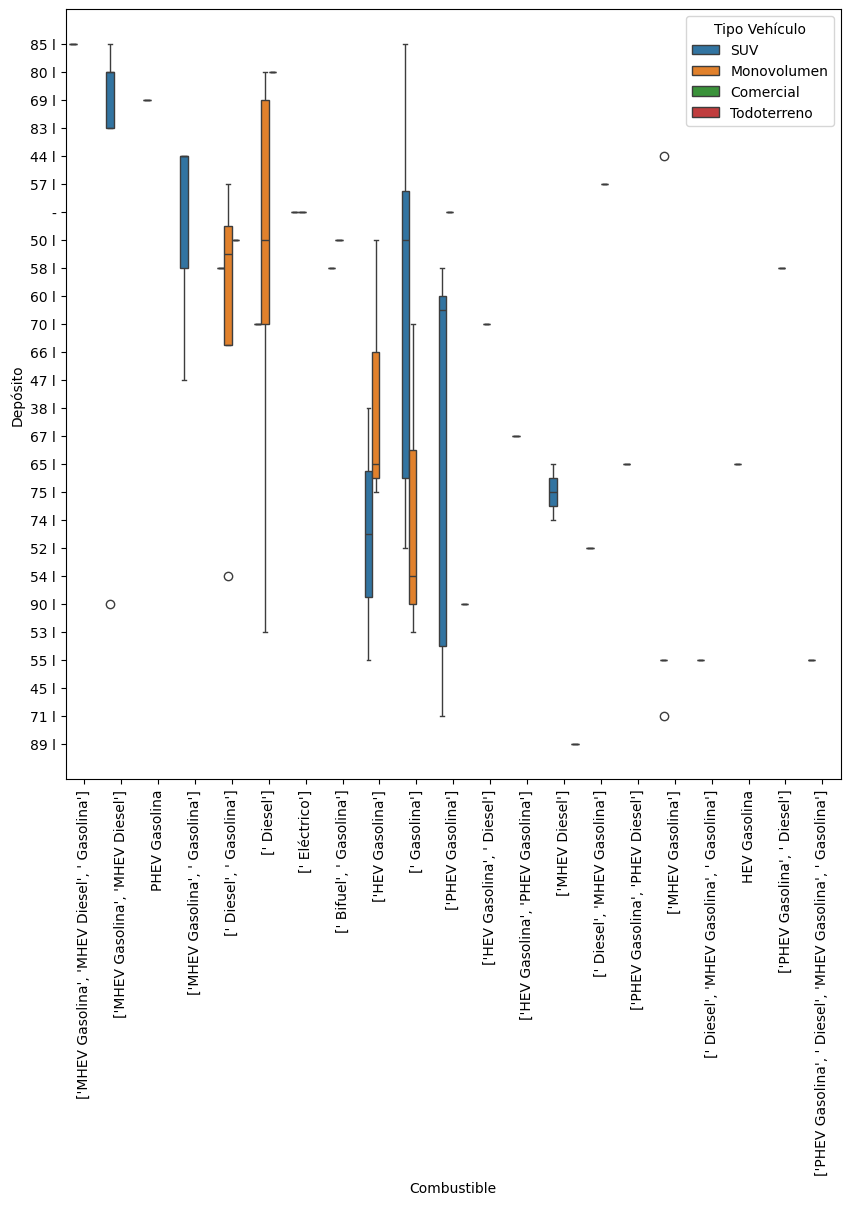

In [45]:
# Como es de esperar, los vehículos comerciales tienen mayor depósito, los suv tienen un amplio rango al igual que los monovolumen, pero la media de depósito entre estos dos últimos es de 10l de diferencia. (Este dato es importante si tenemos en cuenta el tipo de combustible)
# voy a hacer una comparativa  triple
plt.figure(figsize=(10,10))
sns.boxplot(x = "Combustible",
            y = "Depósito",
            hue = "Tipo Vehículo",
            data=df_datos)
plt.xticks(rotation=90);

In [46]:
# los eléctricos no tienen depósito (algo evidente). los que más capacidad tienen son los diesel y los gasolina. y luego los híbridos, depende un poco del tipo de coche híbrido que sea.
# En el caso de los bifuel estan entre 50-58l (supongo que hace referencia sólo al tanque de la gasolina, ya que los de GLP suelen ser más pequeños)

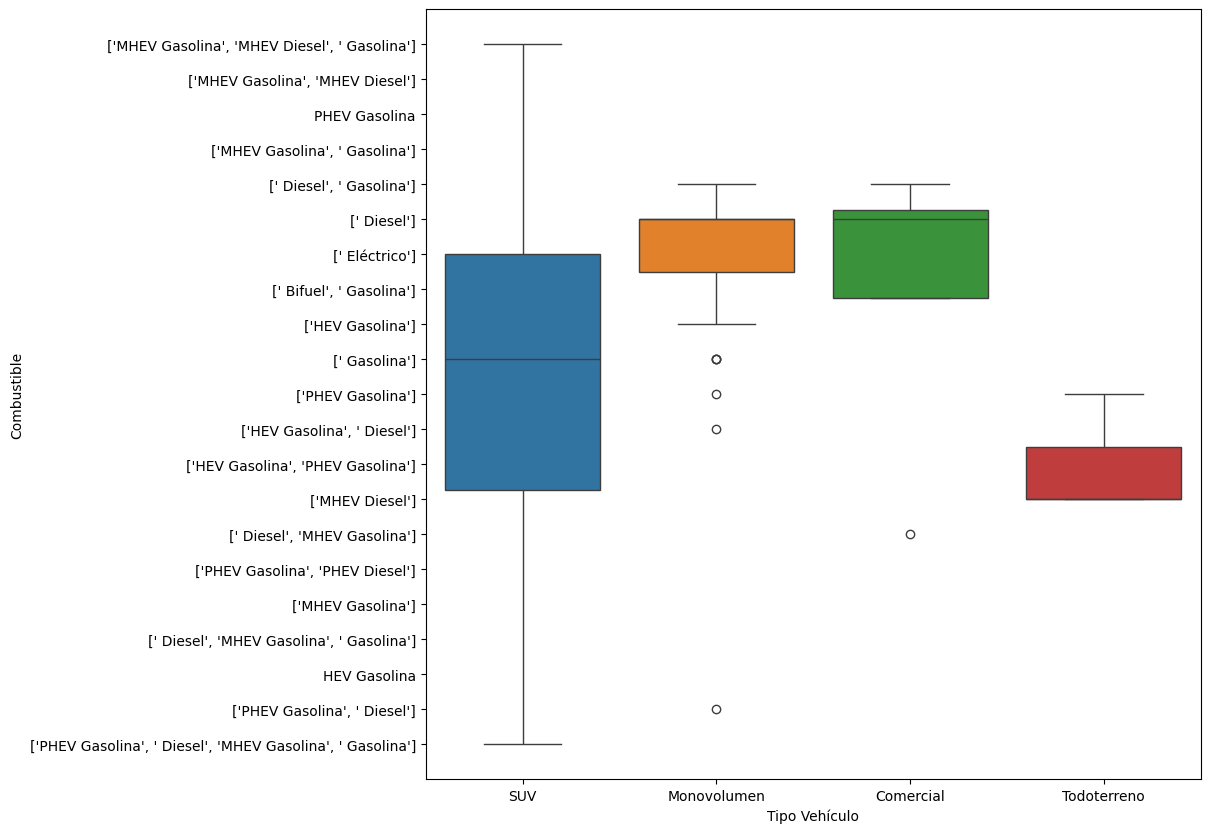

In [47]:
# Tipo de vehículo con combustible
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Combustible",
            hue = "Tipo Vehículo",
            data=df_datos);

In [48]:
# En este relación vemos que la mayor gama de combustibles se presenta en los suv. Y la menor en los todoterreno. Aunque en general las otras tres parecen estar más limitadas. Lo que si es curioso es que los todotereno no son eléctricos 100% en cambio si que existe esa opción en el resto.

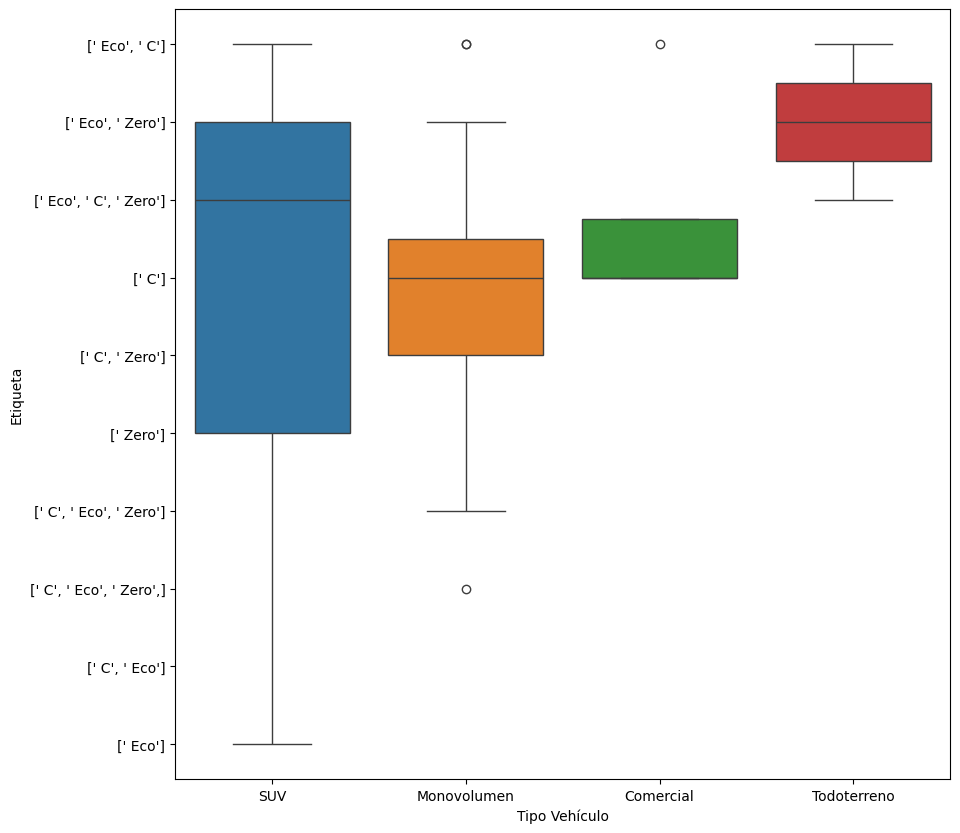

In [49]:
# Tipo de vehículos y etiquetas
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Etiqueta",
            hue = "Tipo Vehículo",
            data=df_datos);

In [50]:
# Bastante interesante la relación. los vehiculos comerciales parece que es su mayoria son etiqueta C (muy relacionado con su principal combustible que era el diesel)
# El resto de vehículos pueden tener las tres etiquetas en relación a los combustibles que usen.


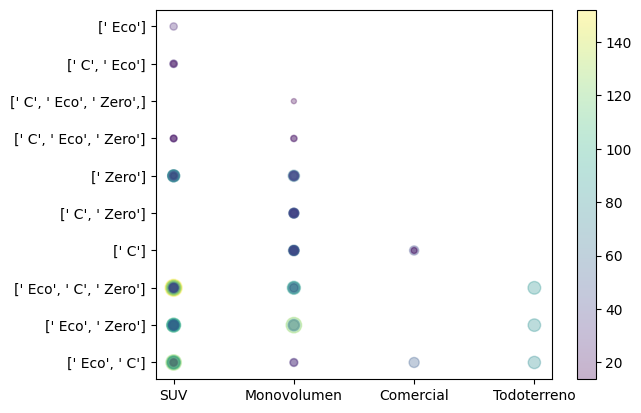

In [51]:
# Voy a comparar las etiquetas con el precio y con el tipo de vehículo para ver si a "mejor etiqueta", el precio es más elevado
plt.scatter(x = df_datos['Tipo Vehículo'], y = df_datos['Etiqueta'], c = df_datos['Precio'], s = df_datos['Precio'], alpha = 0.3,
            cmap='viridis');
plt.colorbar()

In [52]:
# La verdad que no aporta mucha información, aunque sí algunas interesantes. Puedes adquirir SUV relativamente económicos con etiqueta Eco y monovolumenen también.
# Los vehículos de Zero emisiones son los más caros como ya sospechábamos Y de la etiqueta C (aparentemente deberían ser los más económicos, no lo son tanto)

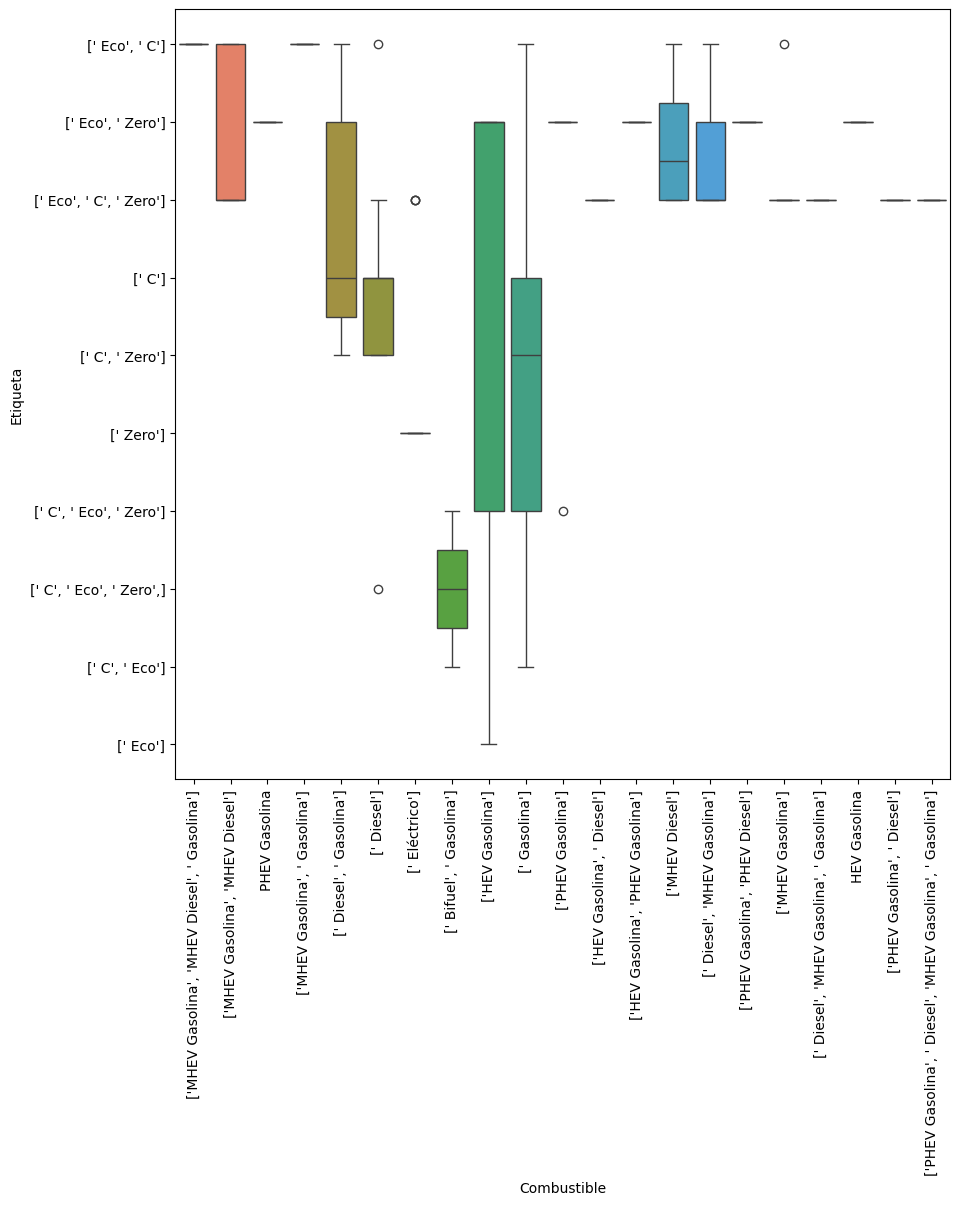

In [53]:
# Voy a hacer una comparativa de combustibles con etiquetas
plt.figure(figsize=(10,10))
sns.boxplot(x = "Combustible",
            y = "Etiqueta",
            hue = "Combustible",
            data=df_datos)
plt.xticks(rotation=90);

In [54]:
# Confirmamos que los vehículos electricos tienen etiqueta Zero y los diesel y gasolina la C. El resto de vehículos que son difrentes tipos de híbridos puedes tenerlos con las 3 etiquetas.

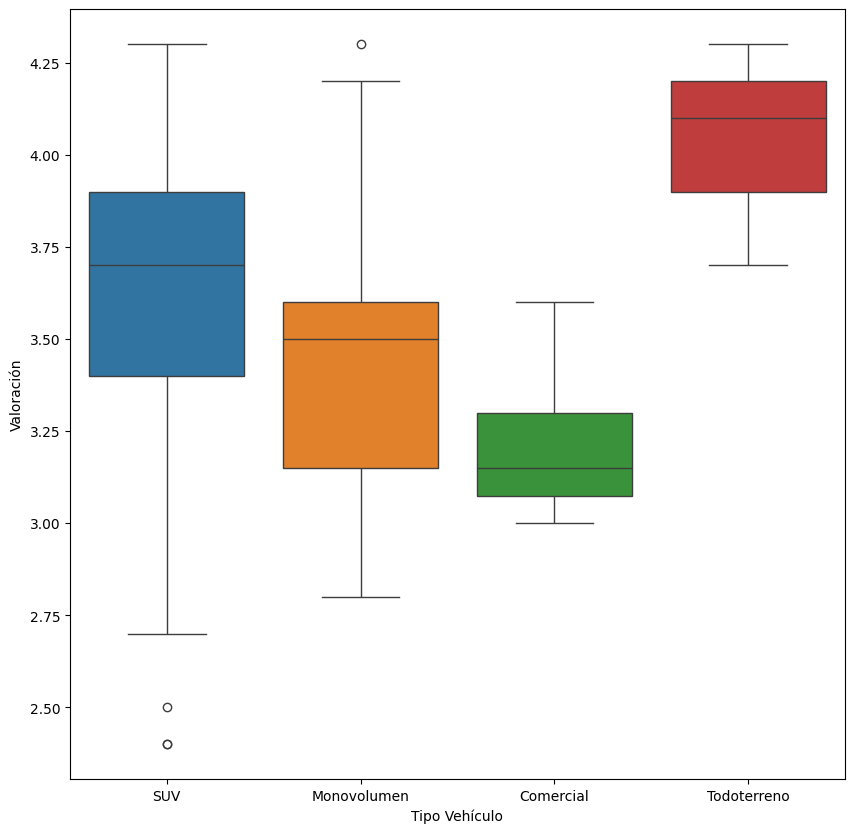

In [55]:
# Finalmente vamos a ver las valoraciones
plt.figure(figsize=(10,10))
sns.boxplot(x = "Tipo Vehículo",
            y = "Valoración",
            hue = "Tipo Vehículo",
            data=df_datos);

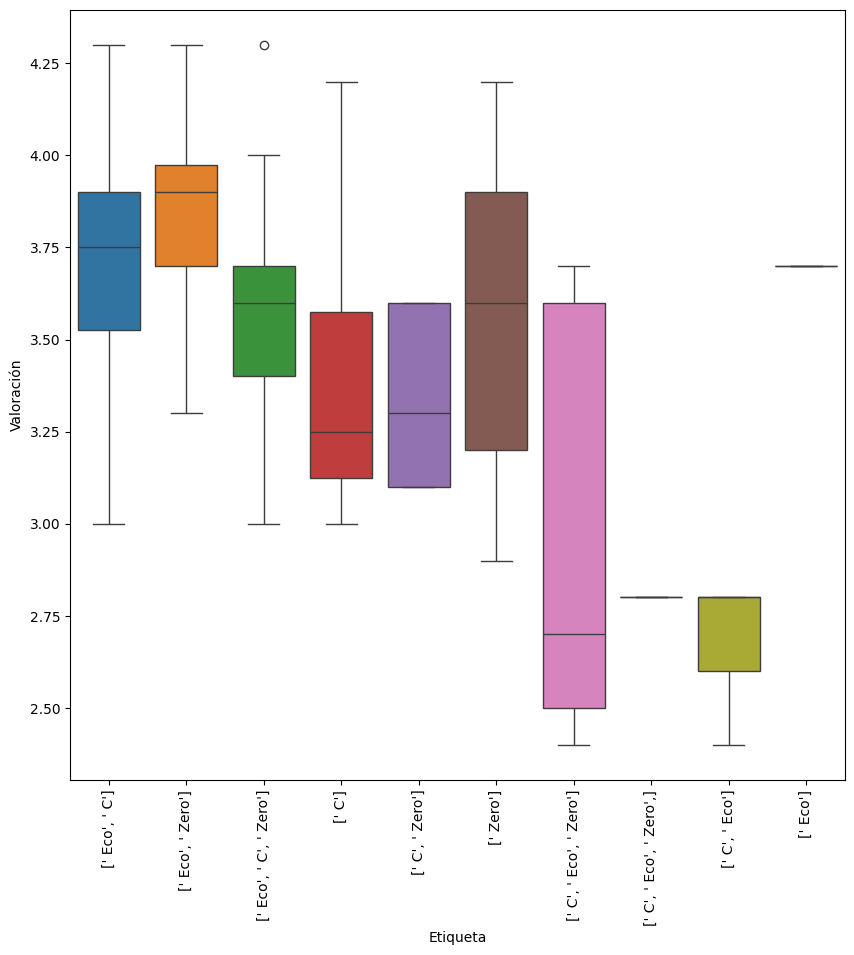

In [56]:
# Las mejores valoraciones son para los todoterreno y los suv (a pesar de que tienem dos valores tremendamente bajos). La media de valoración está en 3,20 y 3,80.
# Voy a ver si existe alguna relación entre la valoración y el etiquetado
plt.figure(figsize=(10,10))
sns.boxplot(x = "Etiqueta",
            y = "Valoración",
            hue = "Etiqueta",
            data=df_datos)
plt.xticks(rotation=90);

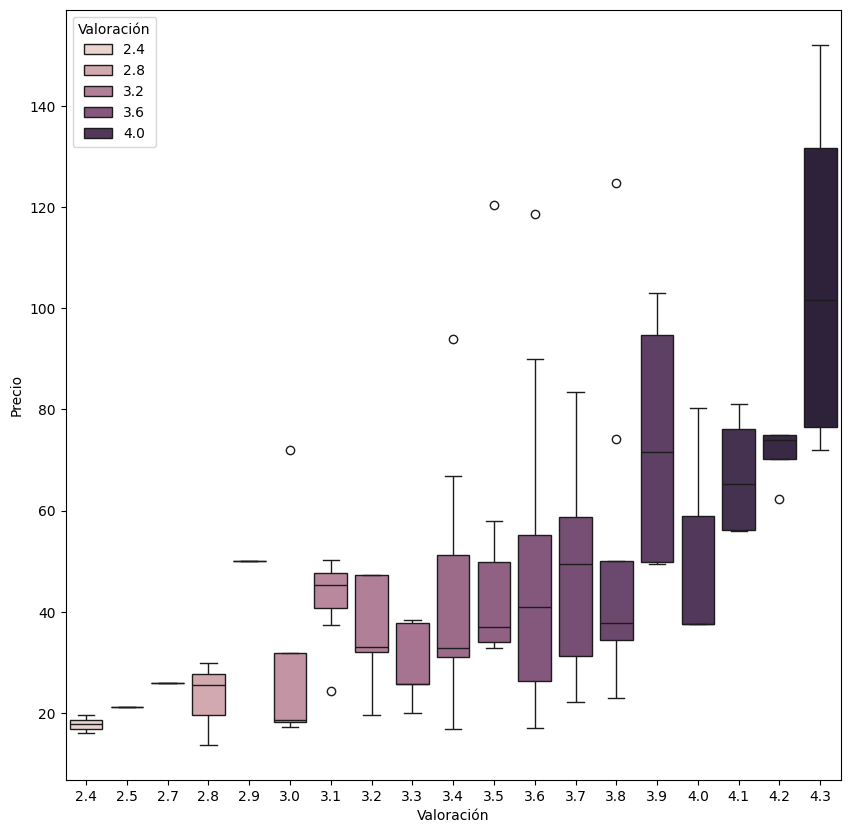

In [57]:
# No parece existir una relación directa, ya que los C no son los peor valorados, ni los zero los mejor valorados. Hay un poco de todo
# Voy a ver si hay rrelacion con el precio
plt.figure(figsize=(10,10))
sns.boxplot(x = "Valoración",
            y = "Precio",
            hue = "Valoración",
            data=df_datos);

In [58]:
# Parece que sí tiene más relación la valoración con el precio que con el etiquetado, a menos precio, menor valoración.

## Resumen análisis Bivariante y Multivariante
- Los SUV suelen tener entre 2 y 3 isofix. Al igual que las monovolúmen. El resto de vehículos depende un poco del número de plazas (pero parecen tener más variedad).
- En general las monovolumenes tienen más capacidad de maletero que los SUV (probablemente por el tamaño del vehíulo). Los todoterrenos son más limitados y las comerciales obviamente tienen muchísisma mas capacidad (en realidad están más pensadas para transporte de material que para viajeros).
- Partiendo de que un garaje estándar mide unos 5m de largo por 2,5m de ancho, la mayoría de SUV y Monovolúmen entran sin muchos problemas. Los Comerciales si son más largos y los Todoterreno estarías más justo en cuanto al ancho (están más cerca de los 2m).
- En cuanto a las potencias de los motores, están en cierto modo relacionadas con los combustibles y por ende, con los motores que tengan dichos vehículos. Por lo que se debería considerar un poco más particularmente. Pero por hacernos una idea, a grandes rasgos los todoterrenos tienen motorres MHEV(mild hybrid electric vehicle) diesel con potencia entorno a los 150-170 CV de media, aunque los hay bastante potentes.En cuanto a los SUV sus combustibles y potencias son diversos y variados. En cambio las monovolumen se centran en diesel, gasolina, algún electrico y algún Hibrido gasolina. Sus potencias son bastante variadas. Y finalmente, aparentemente los vehículos comerciales son principalmente diesel y su potencia está en torn a 110-170CV.
- Si nos centramos más en el tipo de combustible, podemos ver que la mayor gama de combustibles se presenta en los SUV. Y la menor en los Todoterreno. Aunque en general las restantes parecen estar más limitadas.
- Como datos curioso, observamos que en nuestro listado no hay Todoterrenos electricos 100%.
- En cuanto al etiquetado medioambiental (para mí bastante relevante si deseas entrar en los centros de ciertas ciudades como puede ser Madrid), existe unas conclusiones bastante interesantes al respecto. Los vehiculos comerciales parece que en su mayoria son etiqueta C (muy relacionado con su principal combustible que era el diesel). El resto de vehículos pueden tener las tres etiquetas en relación a los combustibles que usen, por lo que existe variedad, según las ecesidades de cada usuario.
- Al comparar las etiquetas medioambientales con los tipos de vehículos y sus precios he visto que no hay una relación muy directa entre ellos. Puedes adquirir SUV relativamente económicos con etiqueta Eco y Monovolúmen también. Los vehículos de Zero emisiones son los más caros como ya sospechábamos. Y de la etiqueta C aparentemente deberían ser los más económicos, y no lo son tanto.
- La distribución de etiquetas es la siguiente: los vehículos electricos tienen etiqueta Zero y los diesel y gasolina la C. El resto de vehículos que son difrentes tipos de híbridos puedes adquirirlos con las 3 etiquetas.
- Si nos fijamos en las valoraciones y los tipos de vehículos, las mejores valoraciones son para los Todoterreno y los SUV (a pesar de que tienem dos valores tremendamente bajos). La media de valoración está en 3,20 y 3,80.
- Si comparo el etiquetado con las valoraciones, observo que no parece existir una relación directa, ya que los C no son los peor valorados, ni los Zero los mejor valorados. Hay un poco de todo.
- En cambio, parece que sí tiene más relación la valoración con el precio que con el etiquetado, a menos precio, menor valoración.

### Finalmente voy a hacer una serie de comprobaciones para poder poenrle nombre a esos vehículos que nos pueden interesar a la hora de ir a hacer visitas al concesionario.

In [59]:
# Voy a crear diferentes categorias de coches según precios

def gama_vehiculo (elemento):
    gama = elemento.Precio
    if gama <= 20.000:
        return 'Económico'
    elif gama >20.000 and gama <= 40.000:
        return 'Media'
    elif gama >40.000 and gama <= 60.000:
        return 'Caro'
    else:
        return 'Lujo'

In [60]:
# Aplico la función
df_datos['Gama'] = df_datos.apply(gama_vehiculo, axis=1)

In [61]:
# Creo una nueva columna con los nombres completos de cada vehículo
df_datos['Nombre'] = df_datos['Marca'] + df_datos['Modelo']

In [62]:
# Ahora voy a hacer agrupaciones para sacar los 5 vehículos más baratos de cada gama
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama']].groupby(['Precio', 'Gama']).min()

,,Nombre,Tipo Vehículo
Precio,Gama,,
13.700,Económico,Dacia['Lodgy'],Monovolumen
15.990,Económico,SWM['G03F'],SUV
16.900,Económico,"Opel['Frontera', 'eléctrico']",SUV
17.040,Económico,Dacia['Jogger'],Monovolumen
17.200,Económico,Nissan['NV300'],Comercial
...,...,...,...
118.594,Lujo,Mercedes-Benz['GLS'],SUV
120.510,Lujo,BMW['X7'],SUV
124.770,Lujo,Audi['SQ7'],SUV


In [63]:
# Los cinco vehículos más baratos de la gama baja son: Dacia Lodgy, SWM G03F, Opel Frontera eléctrico, Dacia Jogger y Nissan NV300.

In [64]:
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama']].groupby(['Gama', 'Precio']).min()

Nombre Tipo Vehículo
Gama  Precio                                                              
Caro  41.726                       Ford['Tourneo', 'Custom']   Monovolumen
      42.100                            Volkswagen['Tayron']           SUV
      43.137  Toyota['ProAce', 'City', 'Verso', 'eléctrico']   Monovolumen
      43.866                             Nissan['Primastar']     Comercial
      44.300              Mitsubishi['Outlander', 'Híbrido']           SUV
...                                                      ...           ...
Media 37.660                    Peugeot['5008', 'eléctrico']           SUV
      37.858                Peugeot['e-Rifter', 'eléctrico']   Monovolumen
      38.000                 Volkswagen['Tayron', 'híbrido']           SUV
      38.438                               Renault['Espace']           SUV
      39.900        KGM (SsangYong)['(SsangYong)', 'Rexton']           SUV

[95 rows x 2 columns]

In [65]:
# Los más económicos de la gama media serían: Peugeot 5008, Peugeot Rifter electrica, Volskwagen Tyron, Renault Espace, KGM Rexton.
# De la gama alta : Ford Tourneo custom, volkswagen Tayron, Toyota ProAce City Verso eléctrica, Nissan Primastar, Mitsubishi Outlander Híbrido

In [66]:
# Agrupación por Tipo de vehículo y Gama
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama']].groupby(['Gama', 'Tipo Vehículo']).min()

Nombre  Precio
Gama      Tipo Vehículo                                                    
Caro      Comercial                           Mercedes-Benz['Vito']  43.866
          Monovolumen                           Citroën['Holidays']  41.726
          SUV                     Hyundai['Santa', 'Fe', 'Híbrido']  42.100
Económico Comercial                      Ford['Transit', 'Connect']  17.200
          Monovolumen                               Dacia['Jogger']  13.700
          SUV                             Citroën['C3', 'Aircross']  15.990
Lujo      Monovolumen        Ford['Tourneo', 'Custom', 'eléctrico']  62.250
          SUV                                            Audi['Q7']  71.900
          Todoterreno    Land Rover['Rover', 'Defender', 'Híbrido']  78.170
Media     Monovolumen         Citroën['Grand', 'C4', 'SpaceTourer']  22.050
          SUV                                           DFSK['600']  21.122

In [67]:
# Si los agrupamos por Tipo de vehículo y Gama
df_datos.loc[: ,['Nombre', 'Tipo Vehículo','Precio', 'Gama']].groupby(['Tipo Vehículo', 'Gama']).min()

Nombre  Precio
Tipo Vehículo Gama                                                         
Comercial     Caro                            Mercedes-Benz['Vito']  43.866
              Económico                  Ford['Transit', 'Connect']  17.200
Monovolumen   Caro                              Citroën['Holidays']  41.726
              Económico                             Dacia['Jogger']  13.700
              Lujo           Ford['Tourneo', 'Custom', 'eléctrico']  62.250
              Media           Citroën['Grand', 'C4', 'SpaceTourer']  22.050
SUV           Caro                Hyundai['Santa', 'Fe', 'Híbrido']  42.100
              Económico                   Citroën['C3', 'Aircross']  15.990
              Lujo                                       Audi['Q7']  71.900
              Media                                     DFSK['600']  21.122
Todoterreno   Lujo       Land Rover['Rover', 'Defender', 'Híbrido']  78.170

In [68]:
# Precios mínimos por tipo de vehiculo
df_datos.loc[: ,['Nombre', 'Tipo Vehículo','Precio', 'Gama']].groupby(by = ['Tipo Vehículo', 'Gama'])[['Nombre','Precio']].min()

Nombre  Precio
Tipo Vehículo Gama                                                         
Comercial     Caro                            Mercedes-Benz['Vito']  43.866
              Económico                  Ford['Transit', 'Connect']  17.200
Monovolumen   Caro                              Citroën['Holidays']  41.726
              Económico                             Dacia['Jogger']  13.700
              Lujo           Ford['Tourneo', 'Custom', 'eléctrico']  62.250
              Media           Citroën['Grand', 'C4', 'SpaceTourer']  22.050
SUV           Caro                Hyundai['Santa', 'Fe', 'Híbrido']  42.100
              Económico                   Citroën['C3', 'Aircross']  15.990
              Lujo                                       Audi['Q7']  71.900
              Media                                     DFSK['600']  21.122
Todoterreno   Lujo       Land Rover['Rover', 'Defender', 'Híbrido']  78.170

In [69]:
# Precios mínimos por gama
df_datos.loc[: ,['Nombre', 'Tipo Vehículo','Precio', 'Gama']].groupby(by = ['Gama', 'Tipo Vehículo'])[['Nombre','Precio']].min()

Nombre  Precio
Gama      Tipo Vehículo                                                    
Caro      Comercial                           Mercedes-Benz['Vito']  43.866
          Monovolumen                           Citroën['Holidays']  41.726
          SUV                     Hyundai['Santa', 'Fe', 'Híbrido']  42.100
Económico Comercial                      Ford['Transit', 'Connect']  17.200
          Monovolumen                               Dacia['Jogger']  13.700
          SUV                             Citroën['C3', 'Aircross']  15.990
Lujo      Monovolumen        Ford['Tourneo', 'Custom', 'eléctrico']  62.250
          SUV                                            Audi['Q7']  71.900
          Todoterreno    Land Rover['Rover', 'Defender', 'Híbrido']  78.170
Media     Monovolumen         Citroën['Grand', 'C4', 'SpaceTourer']  22.050
          SUV                                           DFSK['600']  21.122

In [70]:
# Precios medios por tipo de vehículo
df_datos.loc[: ,['Nombre', 'Tipo Vehículo','Precio', 'Gama']].groupby(by = ['Tipo Vehículo', 'Gama'])[['Nombre','Precio']].max()

Nombre   Precio
Tipo Vehículo Gama                                                
Comercial     Caro                    Nissan['Primastar']   52.403
              Económico                   Nissan['NV300']   19.603
Monovolumen   Caro                Volkswagen['Caravelle']   53.490
              Económico                    Dacia['Lodgy']   17.040
              Lujo                 Volkswagen['Multivan']  125.000
              Media                  Volkswagen['Touran']   37.858
SUV           Caro                   Volkswagen['Tayron']   59.983
              Económico                       SWM['G05F']   19.900
              Lujo                          Volvo['XC90']  152.124
              Media      Volkswagen['Tiguan', 'Allspace']   39.900
Todoterreno   Lujo       Land Rover['Rover', 'Discovery']   83.370

In [71]:
# Precios medios por Gama
df_datos.loc[: ,['Nombre', 'Tipo Vehículo','Precio', 'Gama']].groupby(by = ['Gama', 'Tipo Vehículo'])[['Nombre', 'Precio']].max()

Nombre   Precio
Gama      Tipo Vehículo                                           
Caro      Comercial                   Nissan['Primastar']   52.403
          Monovolumen             Volkswagen['Caravelle']   53.490
          SUV                        Volkswagen['Tayron']   59.983
Económico Comercial                       Nissan['NV300']   19.603
          Monovolumen                      Dacia['Lodgy']   17.040
          SUV                                 SWM['G05F']   19.900
Lujo      Monovolumen              Volkswagen['Multivan']  125.000
          SUV                               Volvo['XC90']  152.124
          Todoterreno    Land Rover['Rover', 'Discovery']   83.370
Media     Monovolumen                Volkswagen['Touran']   37.858
          SUV            Volkswagen['Tiguan', 'Allspace']   39.900

In [72]:
# Voy a ver por valoraciones
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama', 'Valoración']].groupby(by = ['Gama', 'Tipo Vehículo'])[['Nombre','Valoración']].min()

Nombre  \
Gama      Tipo Vehículo                                               
Caro      Comercial                           Mercedes-Benz['Vito']   
          Monovolumen                           Citroën['Holidays']   
          SUV                     Hyundai['Santa', 'Fe', 'Híbrido']   
Económico Comercial                      Ford['Transit', 'Connect']   
          Monovolumen                               Dacia['Jogger']   
          SUV                             Citroën['C3', 'Aircross']   
Lujo      Monovolumen        Ford['Tourneo', 'Custom', 'eléctrico']   
          SUV                                            Audi['Q7']   
          Todoterreno    Land Rover['Rover', 'Defender', 'Híbrido']   
Media     Monovolumen         Citroën['Grand', 'C4', 'SpaceTourer']   
          SUV                                           DFSK['600']   

                         Valoración  
Gama      Tipo Vehículo              
Caro      Comercial             3.1  
          Monovolumen           2.9  
          SUV                   3.5  
Económico Comercial             3.0  
          Monovolumen           2.8  
          SUV                   2.4  
Lujo      Monovolumen           3.4  
          SUV                   3.0  
          Todoterreno           3.7  
Media     Monovolumen           3.1  
          SUV                   2.5

In [73]:
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama', 'Valoración']].groupby(by = ['Gama', 'Tipo Vehículo'])[['Nombre','Valoración']].max()

Nombre  Valoración
Gama      Tipo Vehículo                                              
Caro      Comercial                   Nissan['Primastar']         3.6
          Monovolumen             Volkswagen['Caravelle']         3.9
          SUV                        Volkswagen['Tayron']         4.1
Económico Comercial                       Nissan['NV300']         3.2
          Monovolumen                      Dacia['Lodgy']         3.6
          SUV                                 SWM['G05F']         3.4
Lujo      Monovolumen              Volkswagen['Multivan']         4.3
          SUV                               Volvo['XC90']         4.3
          Todoterreno    Land Rover['Rover', 'Discovery']         4.3
Media     Monovolumen                Volkswagen['Touran']         3.8
          SUV            Volkswagen['Tiguan', 'Allspace']         4.0

In [74]:
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama', 'Valoración']].groupby(by = ['Tipo Vehículo', 'Gama'])[['Nombre','Valoración']].min()

Nombre  \
Tipo Vehículo Gama                                                    
Comercial     Caro                            Mercedes-Benz['Vito']   
              Económico                  Ford['Transit', 'Connect']   
Monovolumen   Caro                              Citroën['Holidays']   
              Económico                             Dacia['Jogger']   
              Lujo           Ford['Tourneo', 'Custom', 'eléctrico']   
              Media           Citroën['Grand', 'C4', 'SpaceTourer']   
SUV           Caro                Hyundai['Santa', 'Fe', 'Híbrido']   
              Económico                   Citroën['C3', 'Aircross']   
              Lujo                                       Audi['Q7']   
              Media                                     DFSK['600']   
Todoterreno   Lujo       Land Rover['Rover', 'Defender', 'Híbrido']   

                         Valoración  
Tipo Vehículo Gama                   
Comercial     Caro              3.1  
              Económico         3.0  
Monovolumen   Caro              2.9  
              Económico         2.8  
              Lujo              3.4  
              Media             3.1  
SUV           Caro              3.5  
              Económico         2.4  
              Lujo              3.0  
              Media             2.5  
Todoterreno   Lujo              3.7

In [75]:
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama', 'Valoración']].groupby(by = ['Tipo Vehículo', 'Gama'])[['Nombre','Valoración']].max()

Nombre  Valoración
Tipo Vehículo Gama                                                   
Comercial     Caro                    Nissan['Primastar']         3.6
              Económico                   Nissan['NV300']         3.2
Monovolumen   Caro                Volkswagen['Caravelle']         3.9
              Económico                    Dacia['Lodgy']         3.6
              Lujo                 Volkswagen['Multivan']         4.3
              Media                  Volkswagen['Touran']         3.8
SUV           Caro                   Volkswagen['Tayron']         4.1
              Económico                       SWM['G05F']         3.4
              Lujo                          Volvo['XC90']         4.3
              Media      Volkswagen['Tiguan', 'Allspace']         4.0
Todoterreno   Lujo       Land Rover['Rover', 'Discovery']         4.3

In [76]:
# Voy a hacer una extraccion en funcion de los combustibles ya que estoy interesada en los bifuel
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama', 'Valoración', 'Combustible']].groupby(by = ['Tipo Vehículo', 'Gama', 'Combustible'])[['Nombre','Valoración']].min()

Nombre  \
Tipo Vehículo Gama      Combustible                                                                                             
Comercial     Caro      [' Diesel', 'MHEV Gasolina']                                                    Mercedes-Benz['Vito']   
                        [' Diesel']                                                                       Nissan['Primastar']   
              Económico [' Diesel', ' Gasolina']                                                   Ford['Transit', 'Connect']   
                        [' Diesel']                                                                           Nissan['NV300']   
Monovolumen   Caro      [' Diesel']                                                                       Citroën['Holidays']   
                        [' Eléctrico']                                                            Fiat['Ulysse', 'eléctrico']   
                        ['HEV Gasolina']                                                         Hyundai['Staria', 'híbrido']   
              Económico [' Bifuel', ' Gasolina']                                                              Dacia['Jogger']   
                        [' Diesel']                                                                            Dacia['Lodgy']   
              Lujo      [' Diesel']                                                               Mercedes-Benz['Clase', 'V']   
                        [' Eléctrico']                                                 Ford['Tourneo', 'Custom', 'eléctrico']   
                        ['HEV Gasolina']                                                                          Lexus['LM']   
                        ['PHEV Gasolina', ' Diesel']                                                   Volkswagen['Multivan']   
                        ['PHEV Gasolina']                                                   Volkswagen['Multivan', 'híbrido']   
              Media     [' Diesel', ' Gasolina']                                        Citroën['Grand', 'C4', 'SpaceTourer']   
                        [' Diesel']                                                                     Opel['Combo', 'Life']   
                        [' Eléctrico']                                                     Citroën['ë-Berlingo', 'eléctrico']   
                        [' Gasolina']                                                                      Nissan['Townstar']   
                        ['HEV Gasolina', ' Diesel']                                                             Ford['S-Max']   
                        ['HEV Gasolina']                                                           Dacia['Jogger', 'híbrido']   
SUV           Caro      HEV Gasolina                                                          Toyota['Highlander', 'Híbrido']   
                        [' Diesel', 'MHEV Gasolina']                                                     Mercedes-Benz['GLB']   
                        [' Eléctrico']                                                      Mercedes-Benz['EQB', 'eléctrico']   
                        ['HEV Gasolina', 'PHEV Gasolina']                                   Hyundai['Santa', 'Fe', 'Híbrido']   
                        ['MHEV Diesel']                                             Land Rover['Rover', 'Discovery', 'Sport']   
                        ['PHEV Gasolina', ' Diesel', 'MHEV Gasolina', '...                               Volkswagen['Tayron']   
                        ['PHEV Gasolina']                                   Land Rover['Rover', 'Discovery', 'Sport', 'Híb...   
              Económico [' Eléctrico']                                                          Opel['Frontera', 'eléctrico']   
                        [' Gasolina']                                                                             SWM['G03F']   
                        ['MHEV Gasolina', ' Gasolina']                                              Citroën['C3', 'Aircr

In [77]:
# Valoración máxima teniendo en cuenta el combustible, la gama y e tipo de vehiculo
df_datos.loc[: ,['Nombre', 'Tipo Vehículo', 'Precio', 'Gama', 'Valoración', 'Combustible']].groupby(by = ['Tipo Vehículo', 'Gama', 'Combustible'])[['Nombre','Valoración']].max()

Nombre  \
Tipo Vehículo Gama      Combustible                                                                                          
Comercial     Caro      [' Diesel', 'MHEV Gasolina']                                                 Mercedes-Benz['Vito']   
                        [' Diesel']                                                                    Nissan['Primastar']   
              Económico [' Diesel', ' Gasolina']                                                Ford['Transit', 'Connect']   
                        [' Diesel']                                                                        Nissan['NV300']   
Monovolumen   Caro      [' Diesel']                                                                Volkswagen['Caravelle']   
                        [' Eléctrico']                                      Toyota['ProAce', 'City', 'Verso', 'eléctrico']   
                        ['HEV Gasolina']                                                      Hyundai['Staria', 'híbrido']   
              Económico [' Bifuel', ' Gasolina']                                                           Dacia['Jogger']   
                        [' Diesel']                                                                         Dacia['Lodgy']   
              Lujo      [' Diesel']                                                               Volkswagen['California']   
                        [' Eléctrico']                                                                      VOYAH['Dream']   
                        ['HEV Gasolina']                                                                       Lexus['LM']   
                        ['PHEV Gasolina', ' Diesel']                                                Volkswagen['Multivan']   
                        ['PHEV Gasolina']                                                Volkswagen['Multivan', 'híbrido']   
              Media     [' Diesel', ' Gasolina']                                                      Volkswagen['Touran']   
                        [' Diesel']                                                                    Volkswagen['Caddy']   
                        [' Eléctrico']                                                    Peugeot['e-Rifter', 'eléctrico']   
                        [' Gasolina']                                                                     SEAT['Alhambra']   
                        ['HEV Gasolina', ' Diesel']                                                          Ford['S-Max']   
                        ['HEV Gasolina']                                                        Dacia['Jogger', 'híbrido']   
SUV           Caro      HEV Gasolina                                                       Toyota['Highlander', 'Híbrido']   
                        [' Diesel', 'MHEV Gasolina']                                                  Mercedes-Benz['GLB']   
                        [' Eléctrico']                                                   Mercedes-Benz['EQB', 'eléctrico']   
                        ['HEV Gasolina', 'PHEV Gasolina']                                        Kia['Sorento', 'Híbrido']   
                        ['MHEV Diesel']                                                                     Mazda['CX-80']   
                        ['PHEV Gasolina', ' Diesel', 'MHEV Gasolina', '...                            Volkswagen['Tayron']   
                        ['PHEV Gasolina']                                                       Skoda['Kodiaq', 'híbrido']   
              Económico [' Eléctrico']                                                       Opel['Frontera', 'eléctrico']   
                        [' Gasolina']                                                                          SWM['G05F']   
                        ['MHEV Gasolina', ' Gasolina']                                           Citroën['C3', 'Aircross']   
                        ['MHEV Gasolina']                                           

### Listado de coches interesantes
Voy a sacar un listado de posibles vehículos interesantes( basándome en los resultados obtenidos anteriormente) para luego comparar sus valoraciones con las opiniones de los expertos
### Lista de coches interesantes de gama económica (sólo voy a tener en cuenta los SUV y los Monovolumén):
- Dacia Lodgy
- SWM G03F
- Opel Frontera
- Dacia Jogger	
- Citroën C3 Aircross
- SWM G05F (más caros)


### Lista de coches interesantes de gama media (sólo voy a tener en cuenta los SUV y los Monovolumén):
- Peugeot 5008 eléctrico
- Peugeot e-Rifter eléctrico
- Volkswagen Tayron híbrido
- Renault Espace
- KGM (SsangYong) Rexton
- Citroën Grand C4 SpaceTourer 
- DFSK 600 
- Volkswagen Tiguan Allspace (de los más caros)
- Volkswagen Touran (de los más caros)
- Volkswagen Caddy (mejor valordos en combustible)
- SEAT Alhambra (mejor valordos en combustible)
- Ford S-Max (mejor valordos en combustible)#
- Dacia Jogger híbrido (mejor valordos en combustible) 
- EVO 7 ( mejor valorado en los bifuel) 
- Skoda Kodiaq (mejor valordos en combustible)
- Skoda Enyaq (mejor valordos en combustible)
- Ebro S800 (mejor valordos en combustible) 
- Hyundai Kona (mejor valordos en combustible)
- Peugeot 5008 (mejor valordos en combustible)
- Peugeot 5008 híbrido (mejor valordos en combustible)
- Nissan X-Trail ( valoración mínima en combustible, pero tiene un 3.4 que no es tan mala)
- Hyundai Kona eléctrico (valoración mínima en combustible, pero tiene un 3.6 que no es tan mala)	
- Hyundai Kona Híbrido (valoración mínima en combustible, pero tiene un 3.3 que no es tan mala)	

### Lista de coches interesantes de gama cara (sólo voy a tener en cuenta los SUV y los Monovolumén):
- Ford Tourneo Custom
- Volkswagen Tayron
- Toyota ProAce City Verso
- Mitsubishi Outlander Híbrido
- Citroën Holidays
- Hyundai Santa Fe Híbrido
- Volkswagen Caravelle( mejor valorados)
- Hyundai Staria híbrido( mejor valorados en cuanto a combustible)
- Toyota Highlander Híbrido (mejor valordos en combustible)
- Mercedes-Benz GLB (mejor valordos en combustible)
- Mercedes-Benz EQB eléctrico (mejor valordos en combustible)
- Kia Sorento (mejor valordos en combustible)
- Mazda CX-80 (mejor valordos en combustible)
- Skoda Kodiaq Híbrido

### Lista de coches interesantes de gama lujo (sólo voy a tener en cuenta los SUV y los Monovolumén):
- Mercedes-Benz GLS
- BMW X7	
- Audi SQ7
- Lexus LM
- Land Rover Rover
- Ford Tourneo Custom eléctrico
- Audi Q7 
- Volkswagen Multivan ( mejor valorados)
- Volvo XC90 (mejor valorados)
- Volkswagen California 
- VOYAH Dream (mejor valoradas por combustible)
- Lexus LM ( mejor valorada por combustible)
- Volkswagen Multivan híbrido ( mejor valoradas en combustile)
- BMW X5 Híbrido ( mejor valoradas en combustile)
- Volvo EX90 eléctrico ( mejor valoradas en combustile)
- Mercedes-Benz GLS ( mejor valoradas en combustile)
- Mercedes-Benz GLE Híbrido ( mejor valoradas en combustile)
- Volvo XC90 Híbrido ( mejor valoradas en combustile)
